In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson


In [2]:
data = pd.read_csv('iett_75O.csv')

In [473]:
data.head()

,transaction_date,small_date,transfer_type,usage_type,bus_stop_id
0,2023-01-10 17:51:16.000,2023-01-10,Normal,Tam Kont��r,303461.0
1,2023-01-10 18:28:42.000,2023-01-10,Normal,��ndirimli Abonman,180771.0
2,2023-07-10 06:21:22.000,2023-07-10,Normal,��ndirimli Abonman,118723.0
3,2023-08-28 08:23:54.000,2023-08-28,Normal,Tam Kont��r,118712.0
4,2023-08-22 07:48:57.000,2023-08-22,Normal,Tam Kont��r,303461.0


In [474]:
data.isna().sum()

transaction_date       0
small_date             0
transfer_type          0
usage_type             0
bus_stop_id         2166
dtype: int64

## Feature Extraction

In [475]:
# time
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['time'] = data['transaction_date'].dt.time

data = data.sort_values(by=['transaction_date', 'time'])
data.dropna(inplace = True)


# usage_type
def categorize_usage(value):
    if 'Abon' in value:
        return 'Abonman'
    elif 'Kullan At Kart' in value:
        return 'Kullan At Kart'
    elif 'TANIMSIZ' in value:
        return 'Tanımsız'
    else:
        return 'Normal'

data['usage_type'] = data['usage_type'].apply(categorize_usage)


### Bus Stop Analysis

In [476]:
otogar = [303461, 123882, 123871, 120973, 180761, 180771, 118651, 118681, 118712, 118723, 118664, 118761, 177621, 121271, 118791, 118801, 118118, 118192,301371]
mecidiyekoy = [301571, 118181, 118117, 118802, 121272, 118792, 118782, 177631, 118762, 118663, 118724, 118711, 118683, 118652, 117555, 120974, 123881, 304461]

In [ ]:
ayni_duraklar = set(otogar) & set(mecidiyekoy)

if ayni_duraklar:
    print("has same stops: ", ayni_duraklar)
else:
    print("has not same stops")

In [478]:
# direction
def assign_direction(bus_stop_id):
    if bus_stop_id in otogar:
        return 0
    elif bus_stop_id in mecidiyekoy:
        return 1
    else:
        return 'Transit'
    
data.loc[:, 'direction'] = data['bus_stop_id'].apply(assign_direction)
data.bus_stop_id = data.bus_stop_id.astype(int)

otogar_data = data[data['direction'] == 0]
mecidiyekoy_data = data[data['direction'] == 1]
transit_data = data[data['direction'] == 'Transit']

In [479]:
data.direction.value_counts()

0          11543
Transit    10939
1           7711
Name: direction, dtype: int64

### Transit Passenger Analysis

In [480]:
# determinate transit values and bus stops
data.bus_stop_id[data.direction == 'Transit'].value_counts()
# because of the number of remaining transfers is very low, we remove it from the data (approximately 1/6 of the transfer data was received.)

301351    473
131941    224
119531    151
122121    148
301591    146
         ... 
116781      1
105581      1
115862      1
117472      1
108641      1
Name: bus_stop_id, Length: 920, dtype: int64

In [481]:
# MOSTLY TRANSFERRED 10 LINES IN OUR DATASET AND THEIR LINES

# 301351 -> hacıosman metro (sarıyer)    
# 131941 -> bakırköy (bakırköy)          
# 119531 -> alibeyköy (eyüpsultan)       
# 122121 -> zuhuratbaba (bakırköy)       
# 301591 -> alibeyköy metro (eyüpsultan) 
# 120301 -> adliyeciler sitesi (eyüpsultan) 
# 301071 -> vezneciler (fatih) 
# 120852 -> sakarya mahallesi (eyüpsultan) 
# 112842 -> kilyos merkez (sarıyer)      
# 120881 -> şehitlik (eyüpsultan)       


In [482]:
transfer_stops = [301351, 131941, 119531, 122121, 301591, 120301, 301071, 120852, 112842, 120881]
transit_data = data[data['bus_stop_id'].isin(transfer_stops)]

transit_data

,transaction_date,small_date,transfer_type,usage_type,bus_stop_id,time,direction
7019,2023-01-03 07:07:31,2023-01-03,Normal,Abonman,301351,07:07:31,Transit
5305,2023-01-03 07:07:34,2023-01-03,Normal,Normal,301351,07:07:34,Transit
20984,2023-01-03 07:07:39,2023-01-03,Normal,Normal,301351,07:07:39,Transit
22920,2023-01-03 07:09:56,2023-01-03,Normal,Abonman,301351,07:09:56,Transit
29000,2023-01-03 07:09:59,2023-01-03,Normal,Abonman,301351,07:09:59,Transit
...,...,...,...,...,...,...,...
21706,2023-08-07 18:44:16,2023-08-07,Aktarma,Normal,301351,18:44:16,Transit
9419,2023-08-07 18:44:20,2023-08-07,Aktarma,Normal,301351,18:44:20,Transit
11541,2023-08-07 18:48:24,2023-08-07,Aktarma,Normal,301351,18:48:24,Transit
7734,2023-08-07 18:49:23,2023-08-07,Normal,Abonman,301351,18:49:23,Transit


In [483]:
data

,transaction_date,small_date,transfer_type,usage_type,bus_stop_id,time,direction
15183,2023-01-02 06:53:20,2023-01-02,Normal,Normal,301571,06:53:20,1
9659,2023-01-02 06:55:33,2023-01-02,Normal,Abonman,118291,06:55:33,Transit
4241,2023-01-02 06:56:38,2023-01-02,Normal,Abonman,120231,06:56:38,Transit
19204,2023-01-02 06:56:39,2023-01-02,Aktarma,Normal,120231,06:56:39,Transit
12998,2023-01-02 06:57:42,2023-01-02,Normal,Normal,120231,06:57:42,Transit
...,...,...,...,...,...,...,...
6538,2023-08-30 19:22:50,2023-08-30,Normal,Abonman,177631,19:22:50,1
15494,2023-08-30 19:27:09,2023-08-30,Normal,Normal,118711,19:27:09,1
8474,2023-08-30 19:27:12,2023-08-30,Normal,Normal,118711,19:27:12,1
14772,2023-08-30 19:27:15,2023-08-30,Normal,Normal,118711,19:27:15,1


### Voyage Analysis

In [559]:
otogar_data.loc[:, 'day_of_week'] = otogar_data['transaction_date'].dt.day_name()
mecidiyekoy_data.loc[:, 'day_of_week'] = mecidiyekoy_data['transaction_date'].dt.day_name()
transit_data.loc[:, 'day_of_week'] = transit_data['transaction_date'].dt.day_name()

otogar_data.loc[:, 'month'] = otogar_data['transaction_date'].dt.month
mecidiyekoy_data.loc[:, 'month'] = mecidiyekoy_data['transaction_date'].dt.month
transit_data.loc[:, 'month'] = transit_data['transaction_date'].dt.month

otogar_data_w = otogar_data[otogar_data['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
otogar_data_sa = otogar_data[otogar_data['day_of_week'] == 'Saturday']
otogar_data_su = otogar_data[otogar_data['day_of_week'] == 'Sunday']

mecidiyekoy_data_w = mecidiyekoy_data[mecidiyekoy_data['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
mecidiyekoy_data_sa = mecidiyekoy_data[mecidiyekoy_data['day_of_week'] == 'Saturday']
mecidiyekoy_data_su = mecidiyekoy_data[mecidiyekoy_data['day_of_week'] == 'Sunday']

transit_data_w = transit_data[transit_data['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
transit_data_sa = transit_data[transit_data['day_of_week'] == 'Saturday']
transit_data_su = transit_data[transit_data['day_of_week'] == 'Sunday']

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


####  Otogar Direction

In [558]:
otogar_seferleri_weekday = ['06:00', '07:50', '18:00']
otogar_seferleri_saturday = ['06:00', '07:50', '18:00']
otogar_seferleri_sunday = ['11:00', '13:00', '15:00', '17:15']

def sefer_belirle(row, seferler):
    for index, sefer in enumerate(seferler):
        if index == len(seferler) - 1:  
            if pd.Timestamp(sefer).time() <= row['transaction_date'].time():
                return index
        else:
            if pd.Timestamp(sefer).time() <= row['transaction_date'].time() < pd.Timestamp(seferler[index + 1]).time():
                return index
    return None

otogar_data.loc[otogar_data['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'voyage'] = otogar_data.apply(lambda row: sefer_belirle(row, otogar_seferleri_weekday), axis=1)
otogar_data.loc[otogar_data['day_of_week'] == 'Saturday', 'voyage'] = otogar_data.apply(lambda row: sefer_belirle(row, otogar_seferleri_saturday), axis=1)
otogar_data.loc[otogar_data['day_of_week'] == 'Sunday', 'voyage'] = otogar_data.apply(lambda row: sefer_belirle(row, otogar_seferleri_sunday), axis=1)

mask = (otogar_data['transaction_date'].dt.hour >= 20)
otogar_data = otogar_data[~mask]
otogar_data.dropna(inplace=True)
otogar_data.voyage = otogar_data.voyage.astype(int)

otogar_data

,transaction_date,small_date,transfer_type,usage_type,bus_stop_id,time,direction,day_of_week,month,voyage
10633,2023-01-02 07:38:23,2023-01-02,Normal,Normal,303461,07:38:23,0,Monday,1,0
26396,2023-01-02 07:38:57,2023-01-02,Normal,Normal,303461,07:38:57,0,Monday,1,0
18102,2023-01-02 07:40:16,2023-01-02,Normal,Normal,303461,07:40:16,0,Monday,1,0
14599,2023-01-02 07:40:19,2023-01-02,Normal,Normal,303461,07:40:19,0,Monday,1,0
5183,2023-01-02 07:44:55,2023-01-02,Normal,Abonman,303461,07:44:55,0,Monday,1,0
...,...,...,...,...,...,...,...,...,...,...
27744,2023-08-30 18:23:03,2023-08-30,Normal,Abonman,118723,18:23:03,0,Wednesday,8,2
22122,2023-08-30 18:26:52,2023-08-30,Normal,Abonman,177621,18:26:52,0,Wednesday,8,2
14184,2023-08-30 18:26:54,2023-08-30,Aktarma,Normal,177621,18:26:54,0,Wednesday,8,2
3313,2023-08-30 18:29:10,2023-08-30,Normal,Normal,121271,18:29:10,0,Wednesday,8,2


#### Mecidiyeköy Direction

In [560]:
mecidiyekoy_seferleri_weekday = ['07:00', '09:10', '19:10']
mecidiyekoy_seferleri_saturday = ['07:00', '09:00', '19:10']
mecidiyekoy_seferleri_sunday = ['12:00', '14:00', '16:00', '18:30']

mecidiyekoy_data.loc[mecidiyekoy_data['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'voyage'] = mecidiyekoy_data.apply(lambda row: sefer_belirle(row, mecidiyekoy_seferleri_weekday), axis=1)
mecidiyekoy_data.loc[mecidiyekoy_data['day_of_week'] == 'Saturday', 'voyage'] = mecidiyekoy_data.apply(lambda row: sefer_belirle(row, mecidiyekoy_seferleri_saturday), axis=1)
mecidiyekoy_data.loc[mecidiyekoy_data['day_of_week'] == 'Sunday', 'voyage'] = mecidiyekoy_data.apply(lambda row: sefer_belirle(row, mecidiyekoy_seferleri_sunday), axis=1)

mask = (mecidiyekoy_data['transaction_date'].dt.hour >= 20)
mecidiyekoy_data = mecidiyekoy_data[~mask]
mecidiyekoy_data.dropna(inplace=True)
mecidiyekoy_data.voyage = mecidiyekoy_data.voyage.astype(int)

mecidiyekoy_data

,transaction_date,small_date,transfer_type,usage_type,bus_stop_id,time,direction,day_of_week,month,voyage
13451,2023-01-02 07:10:41,2023-01-02,Normal,Normal,118663,07:10:41,1,Monday,1,0
28646,2023-01-02 07:10:46,2023-01-02,Normal,Normal,118663,07:10:46,1,Monday,1,0
19207,2023-01-02 07:10:52,2023-01-02,Normal,Normal,118663,07:10:52,1,Monday,1,0
106,2023-01-02 07:12:37,2023-01-02,Normal,Normal,118711,07:12:37,1,Monday,1,0
21943,2023-01-02 07:12:41,2023-01-02,Normal,Normal,118711,07:12:41,1,Monday,1,0
...,...,...,...,...,...,...,...,...,...,...
6538,2023-08-30 19:22:50,2023-08-30,Normal,Abonman,177631,19:22:50,1,Wednesday,8,2
15494,2023-08-30 19:27:09,2023-08-30,Normal,Normal,118711,19:27:09,1,Wednesday,8,2
8474,2023-08-30 19:27:12,2023-08-30,Normal,Normal,118711,19:27:12,1,Wednesday,8,2
14772,2023-08-30 19:27:15,2023-08-30,Normal,Normal,118711,19:27:15,1,Wednesday,8,2


#### Transit

In [561]:
transit_data.loc[transit_data['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']), 'voyage'] = transit_data.apply(lambda row: sefer_belirle(row, otogar_seferleri_weekday), axis=1)
transit_data.loc[transit_data['day_of_week'] == 'Saturday', 'voyage'] = transit_data.apply(lambda row: sefer_belirle(row, otogar_seferleri_saturday), axis=1)
transit_data.loc[transit_data['day_of_week'] == 'Sunday', 'voyage'] = transit_data.apply(lambda row: sefer_belirle(row, otogar_seferleri_sunday), axis=1)

mask = (transit_data['transaction_date'].dt.hour >= 20)
transit_data = transit_data[~mask]
transit_data.dropna(inplace=True)
transit_data.voyage = transit_data.voyage.astype(int)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [488]:
oto_voyage = pd.DataFrame(otogar_data.groupby(['month','day_of_week']).voyage.value_counts())
meci_voyage = pd.DataFrame(mecidiyekoy_data.groupby(['month','day_of_week']).voyage.value_counts())
trans_voyage = pd.DataFrame(transit_data.groupby(['month','day_of_week']).voyage.value_counts())

In [489]:
oto_voyage

voyage
month day_of_week voyage        
1     Friday      1           66
                  0           34
                  2           32
      Monday      1          104
                  2           55
...                          ...
8     Tuesday     0           82
                  2           63
      Wednesday   1          122
                  0           72
                  2           52

[175 rows x 1 columns]

In [490]:
meci_voyage

voyage
month day_of_week voyage        
1     Friday      2           76
                  1           37
                  0           36
      Monday      2          112
                  1           86
...                          ...
8     Tuesday     1          102
                  0           51
      Wednesday   2          145
                  0           52
                  1           35

[175 rows x 1 columns]

## EDA

### Passenger Profile

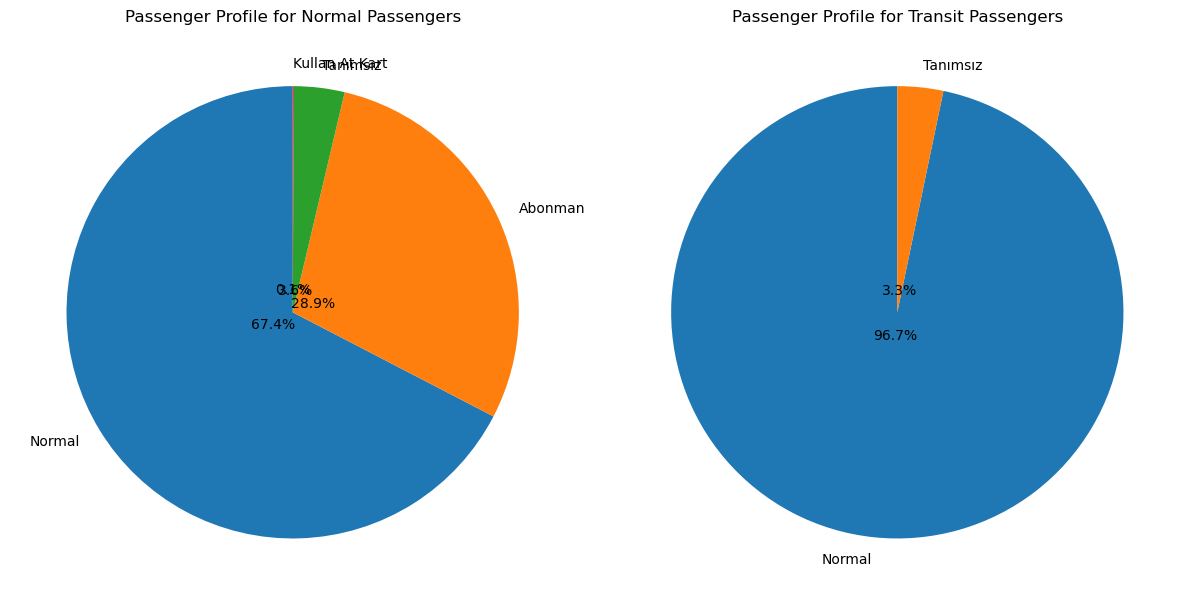

In [491]:
# Passenger Profile Distribution Normal Passengers
normal_data = data[data['transfer_type'] == 'Normal']
normal_counts = normal_data['usage_type'].value_counts()

# Passenger Profile Distribution Transit Passengers
transit = data[data['transfer_type'] == 'Aktarma']
transit_counts = transit['usage_type'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pie Chart for Normal Passengers
ax[0].pie(normal_counts, labels=normal_counts.index, autopct='%.1f%%', startangle=90, pctdistance=0.1)
ax[0].set_title('Passenger Profile for Normal Passengers')

# Pie Chart for Transit Passengers
ax[1].pie(transit_counts, labels=transit_counts.index, autopct='%.1f%%', startangle=90, pctdistance=0.1)
ax[1].set_title('Passenger Profile for Transit Passengers')


plt.tight_layout()
plt.show()

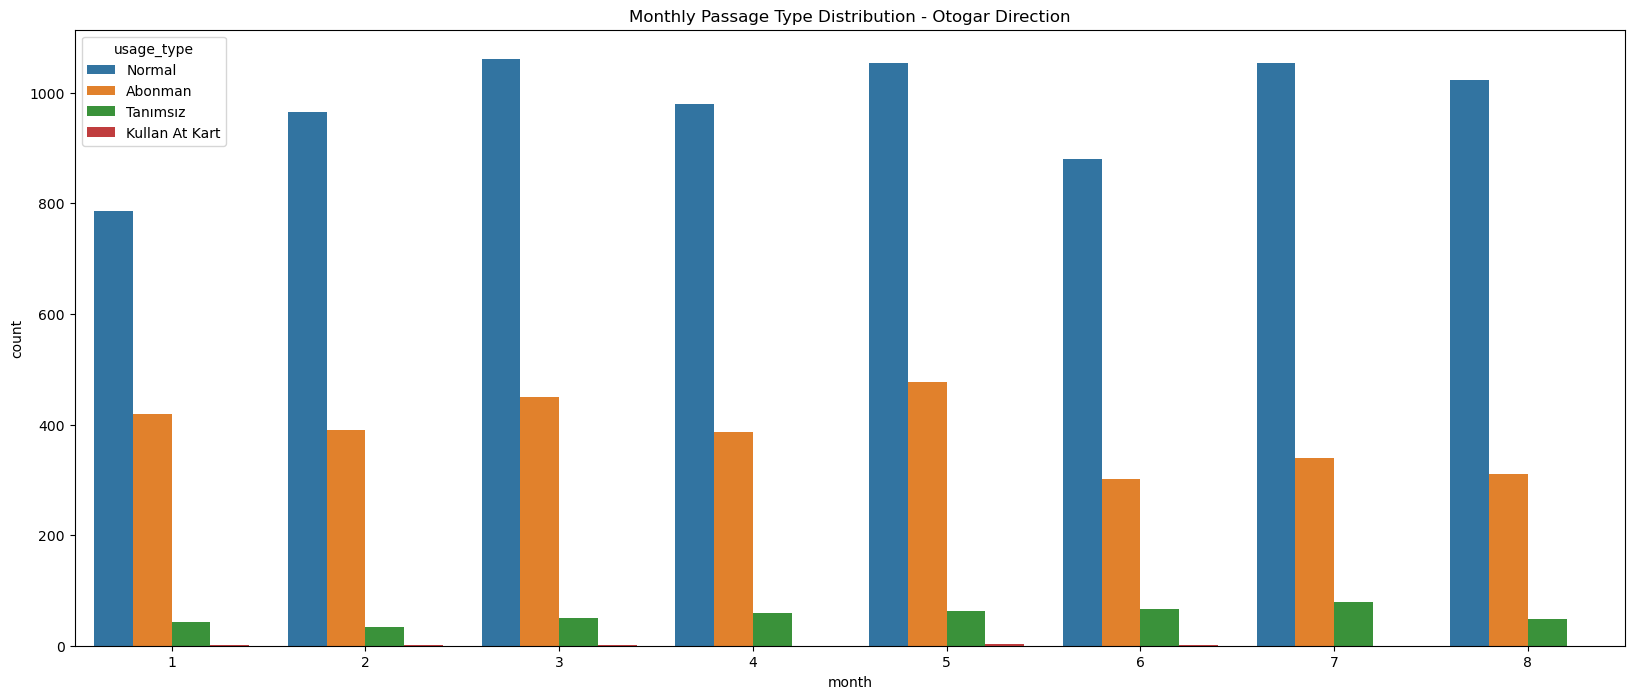

In [492]:
plt.figure(figsize=(20, 8))
plt.title('Monthly Passage Type Distribution - Otogar Direction')
sns.countplot(data=otogar_data, x='month', hue='usage_type')
plt.show()

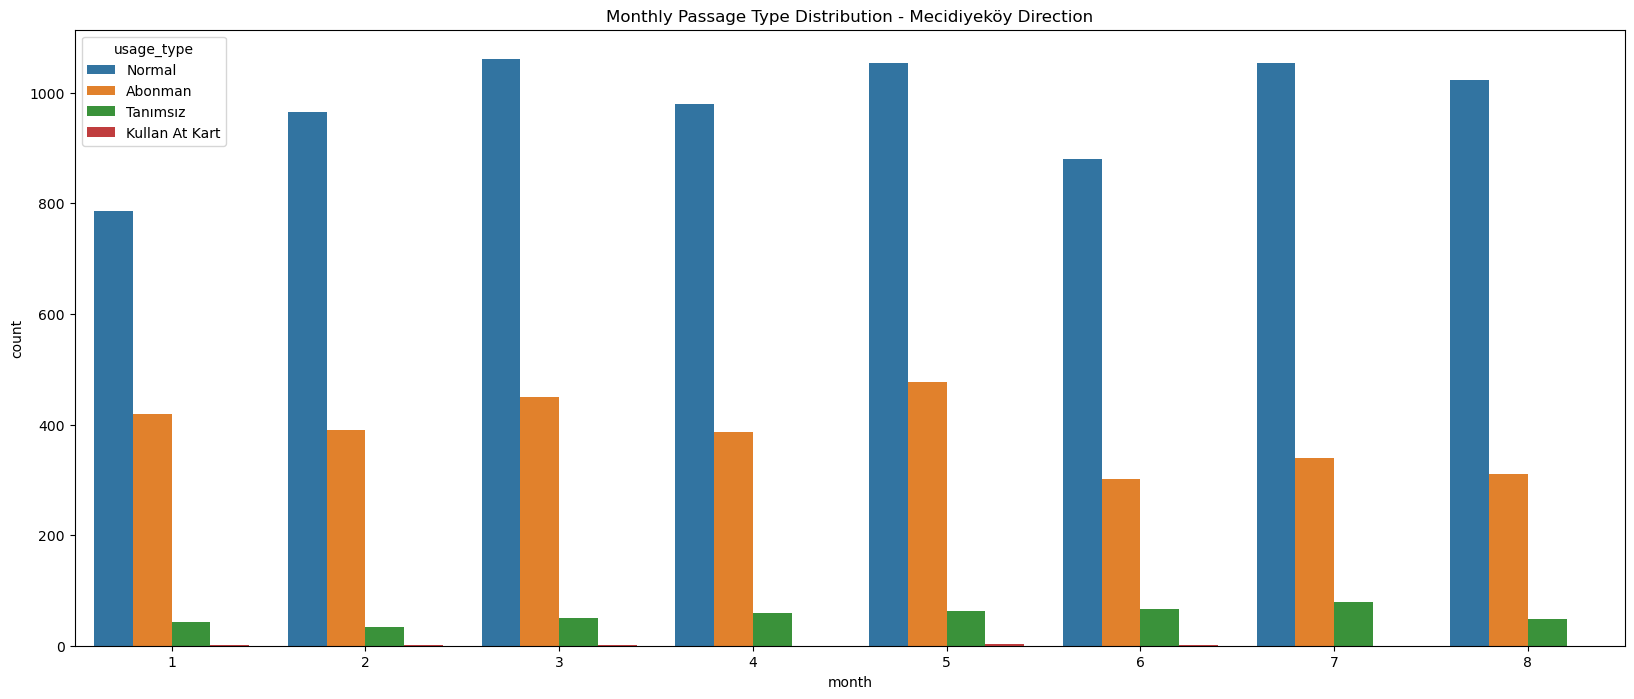

In [493]:
plt.figure(figsize=(20, 8))
plt.title('Monthly Passage Type Distribution - Mecidiyeköy Direction')
sns.countplot(data=otogar_data, x='month', hue='usage_type')
plt.show()

In [494]:
otogar_data

,transaction_date,small_date,transfer_type,usage_type,bus_stop_id,time,direction,day_of_week,month,voyage
10633,2023-01-02 07:38:23,2023-01-02,Normal,Normal,303461,07:38:23,0,Monday,1,0
26396,2023-01-02 07:38:57,2023-01-02,Normal,Normal,303461,07:38:57,0,Monday,1,0
18102,2023-01-02 07:40:16,2023-01-02,Normal,Normal,303461,07:40:16,0,Monday,1,0
14599,2023-01-02 07:40:19,2023-01-02,Normal,Normal,303461,07:40:19,0,Monday,1,0
5183,2023-01-02 07:44:55,2023-01-02,Normal,Abonman,303461,07:44:55,0,Monday,1,0
...,...,...,...,...,...,...,...,...,...,...
27744,2023-08-30 18:23:03,2023-08-30,Normal,Abonman,118723,18:23:03,0,Wednesday,8,2
22122,2023-08-30 18:26:52,2023-08-30,Normal,Abonman,177621,18:26:52,0,Wednesday,8,2
14184,2023-08-30 18:26:54,2023-08-30,Aktarma,Normal,177621,18:26:54,0,Wednesday,8,2
3313,2023-08-30 18:29:10,2023-08-30,Normal,Normal,121271,18:29:10,0,Wednesday,8,2


### Monthly and Daily Passengers

#### Otogar Direction

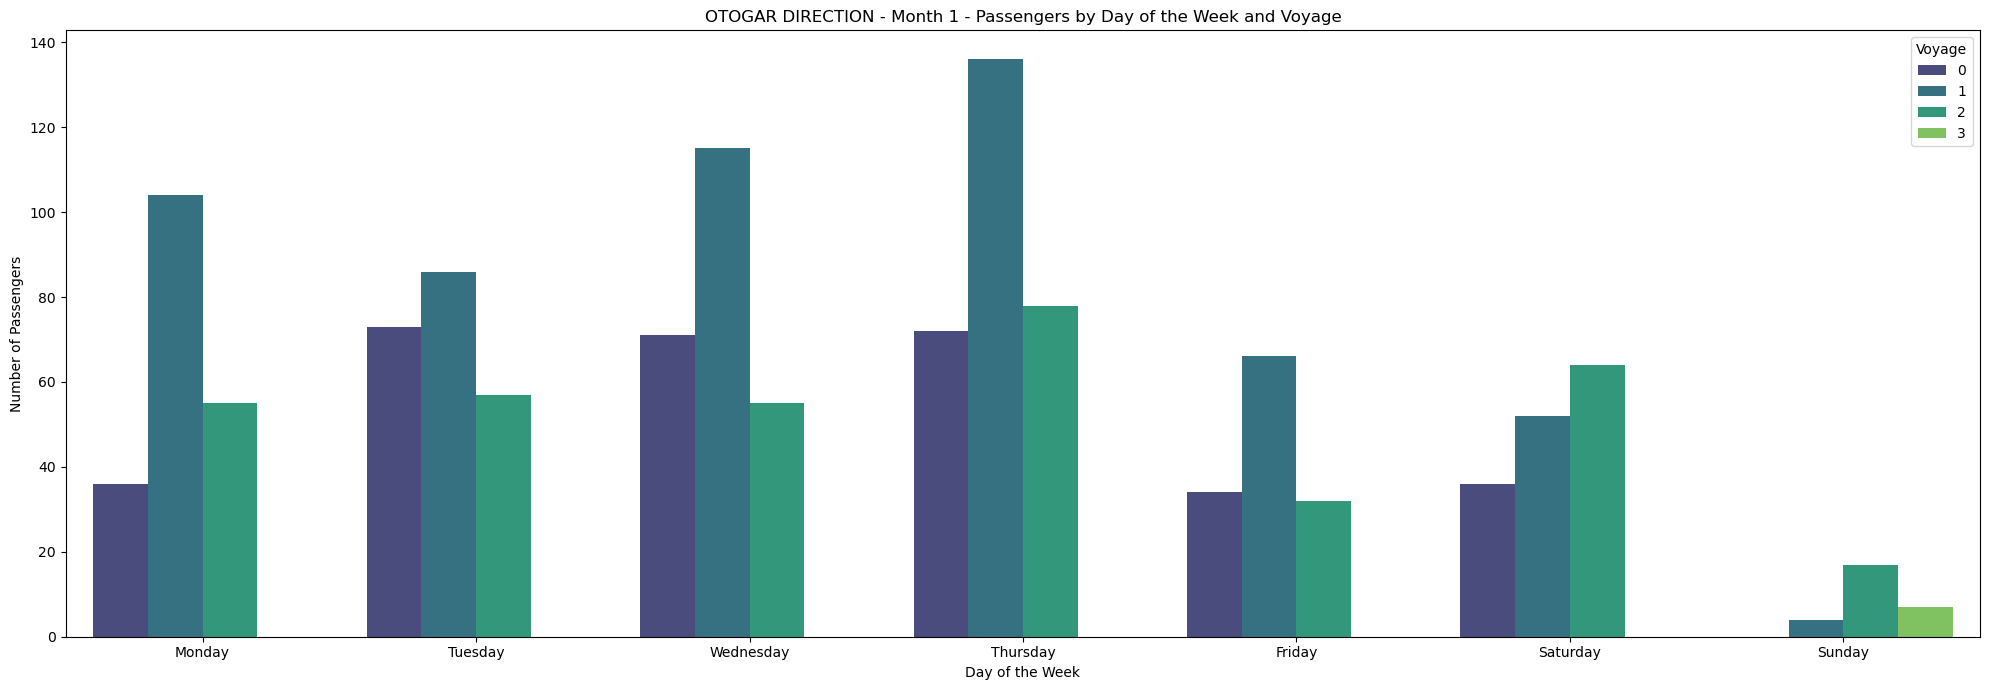

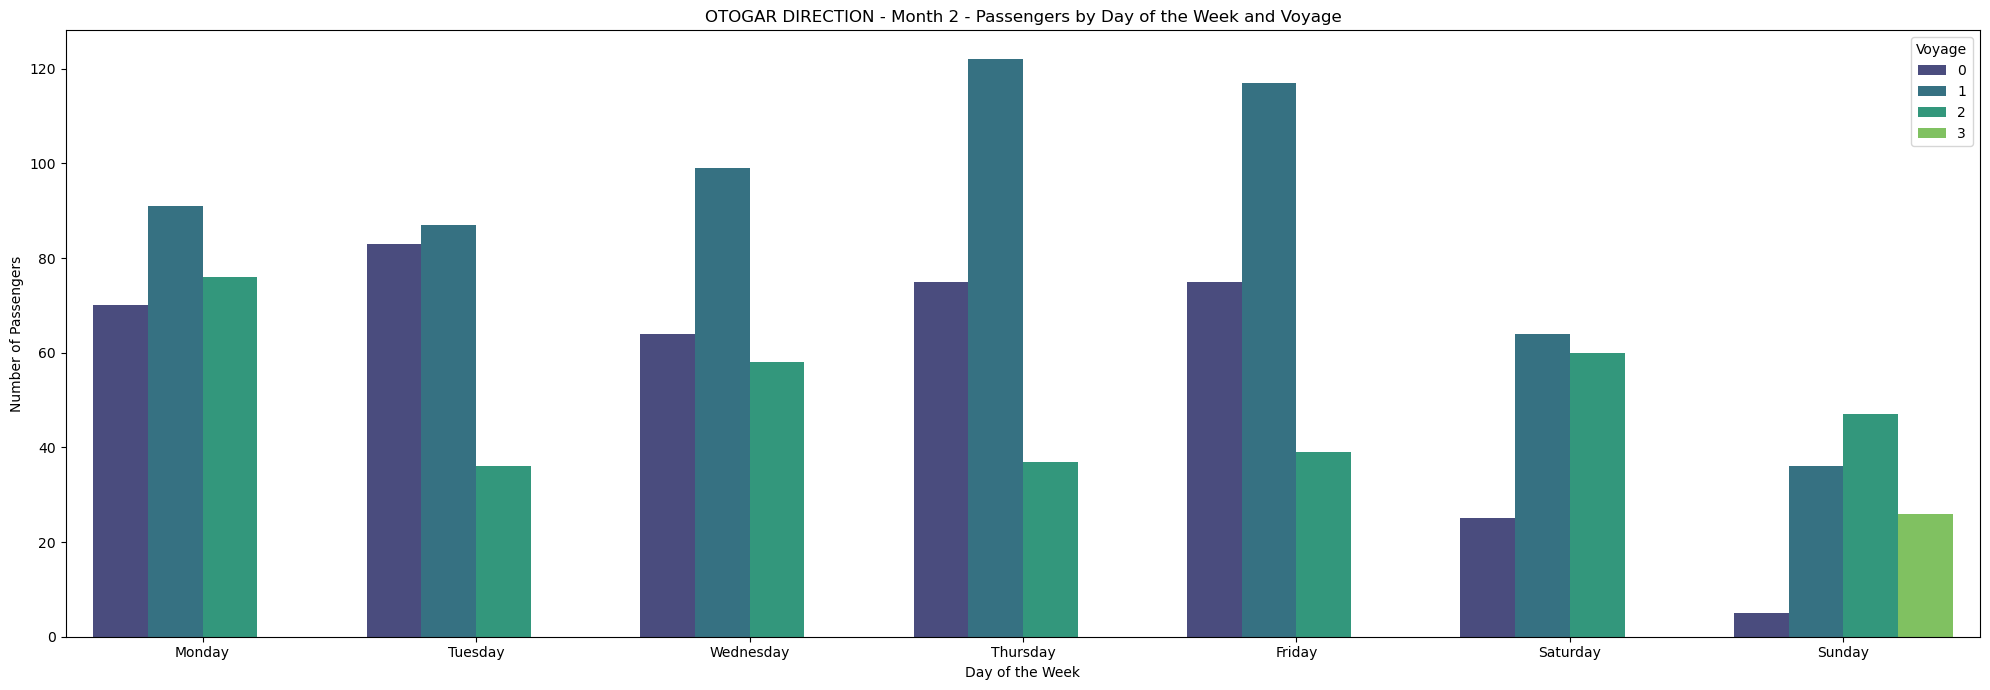

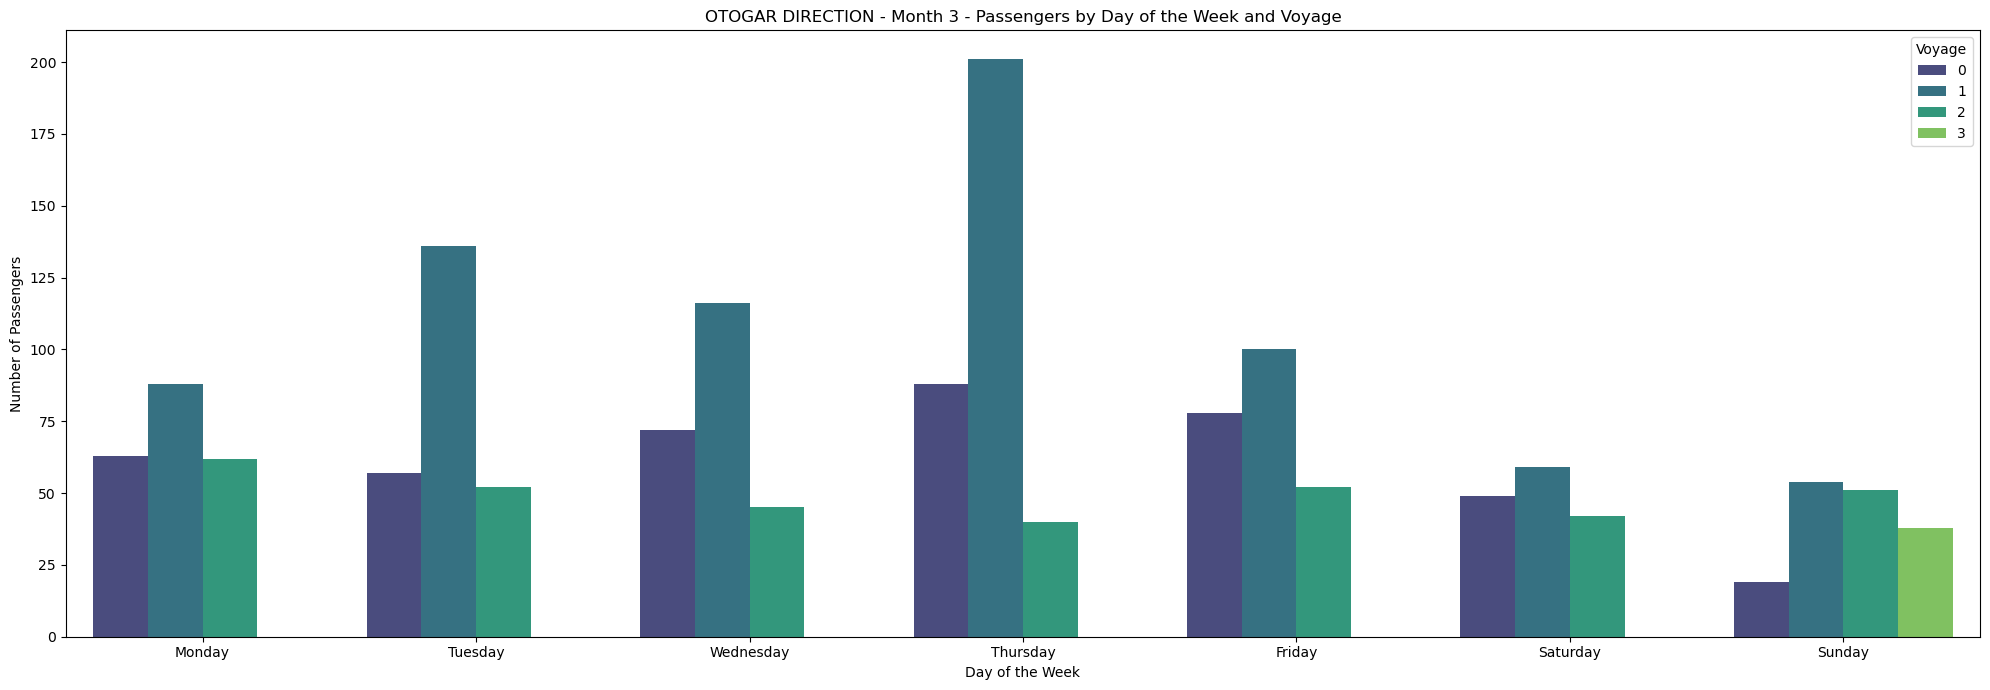

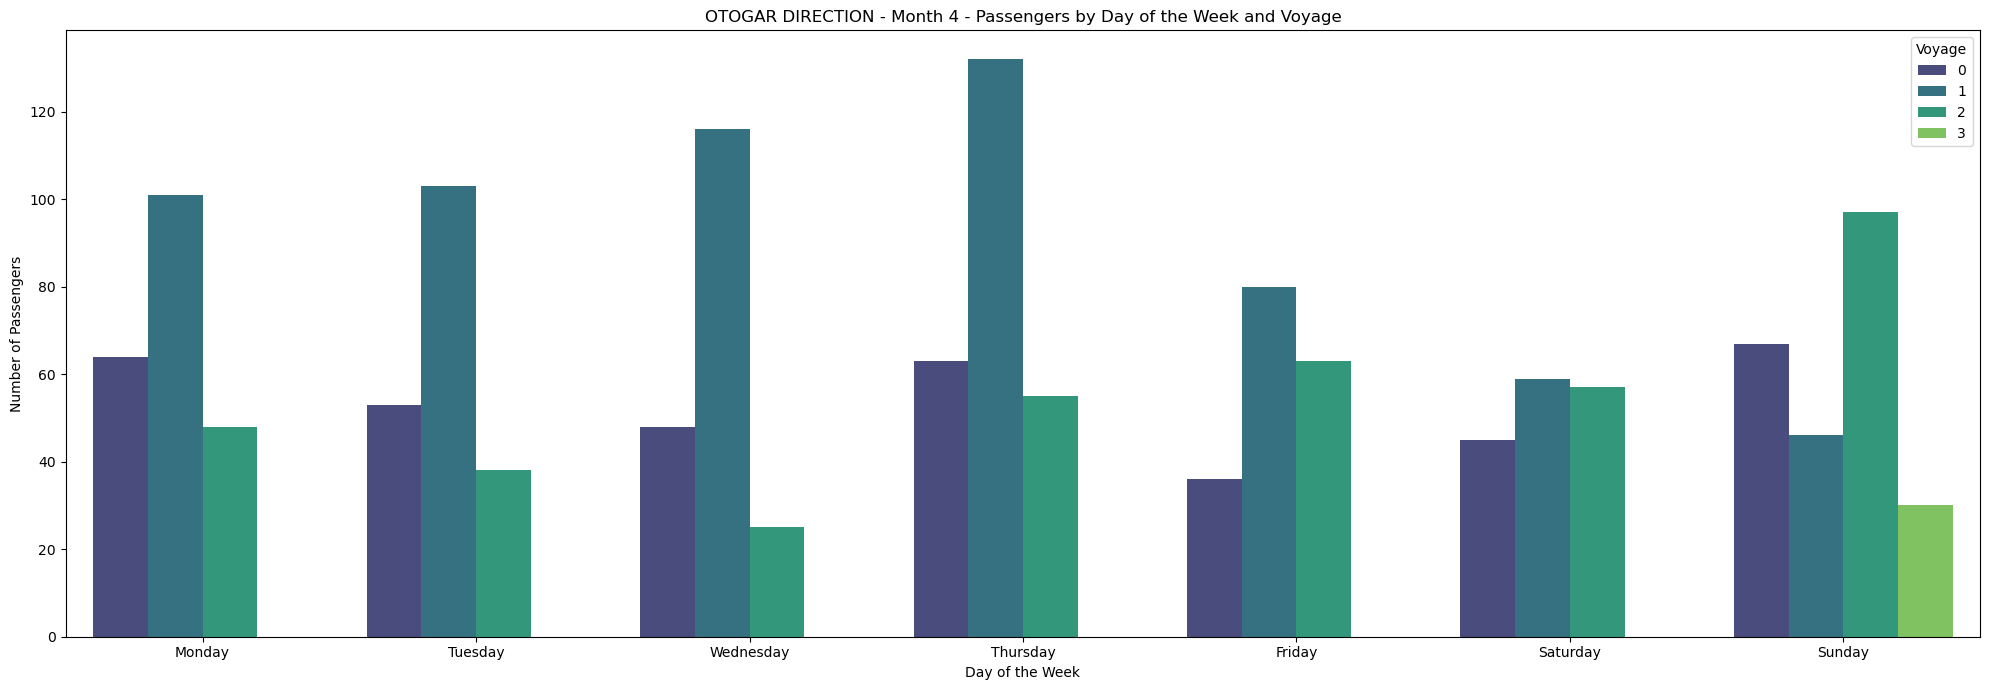

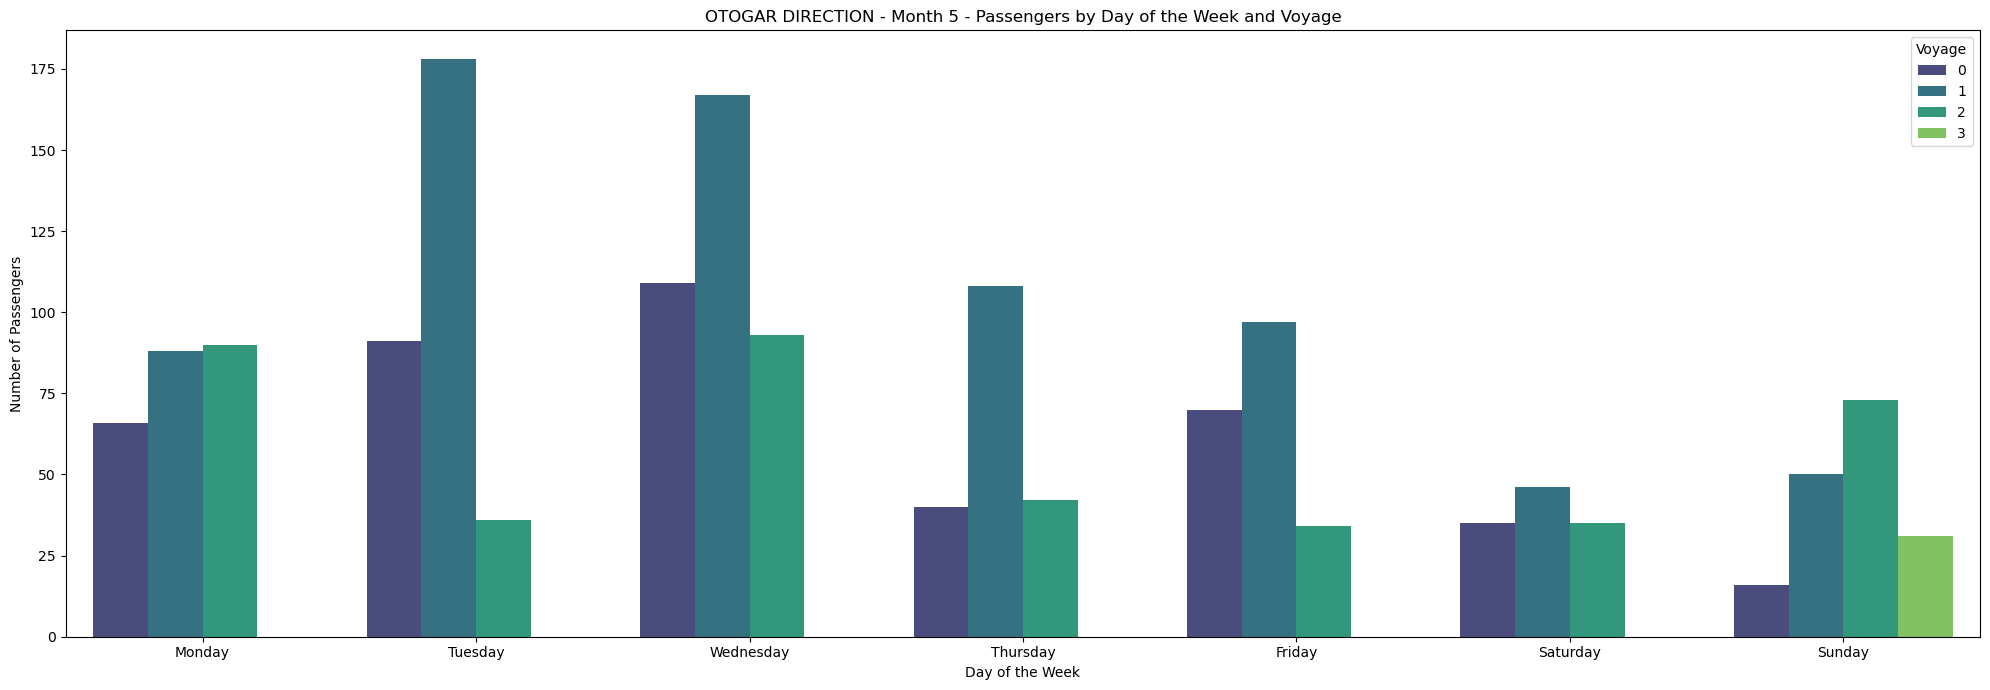

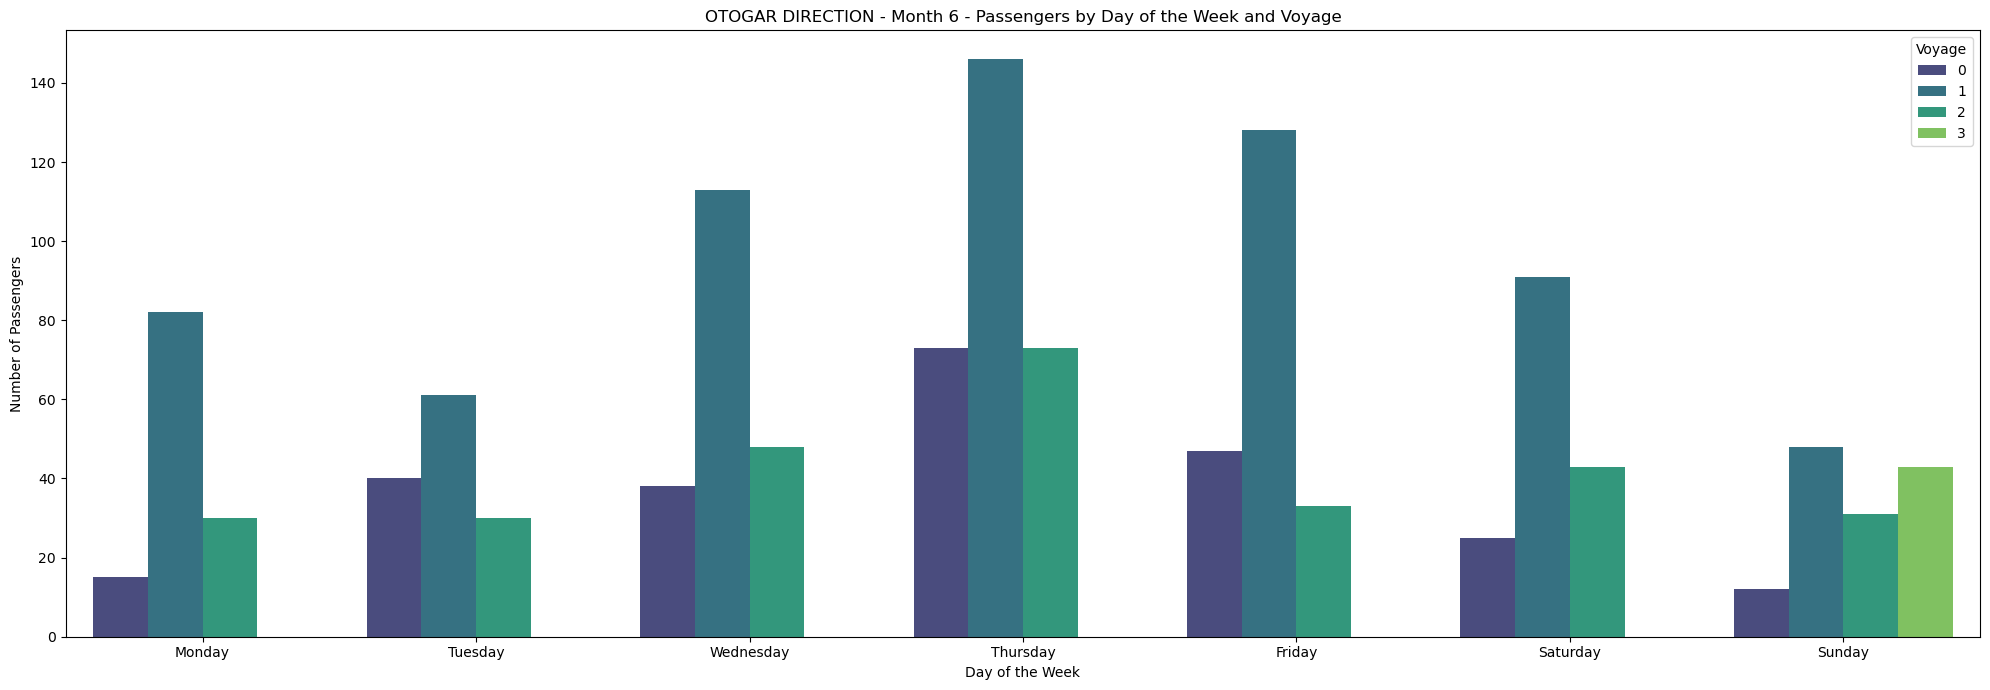

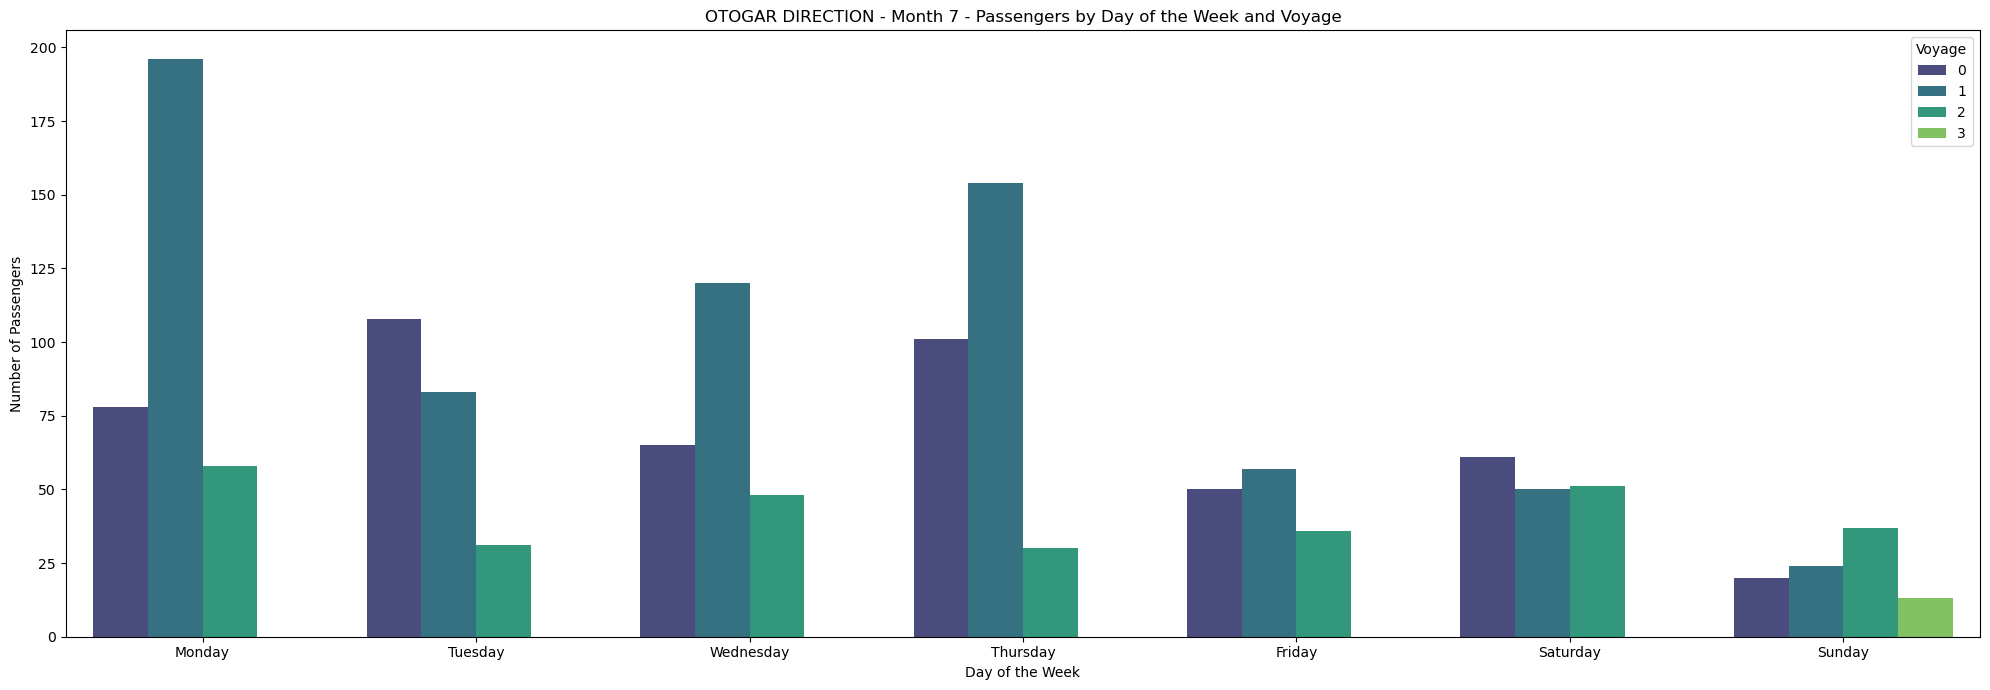

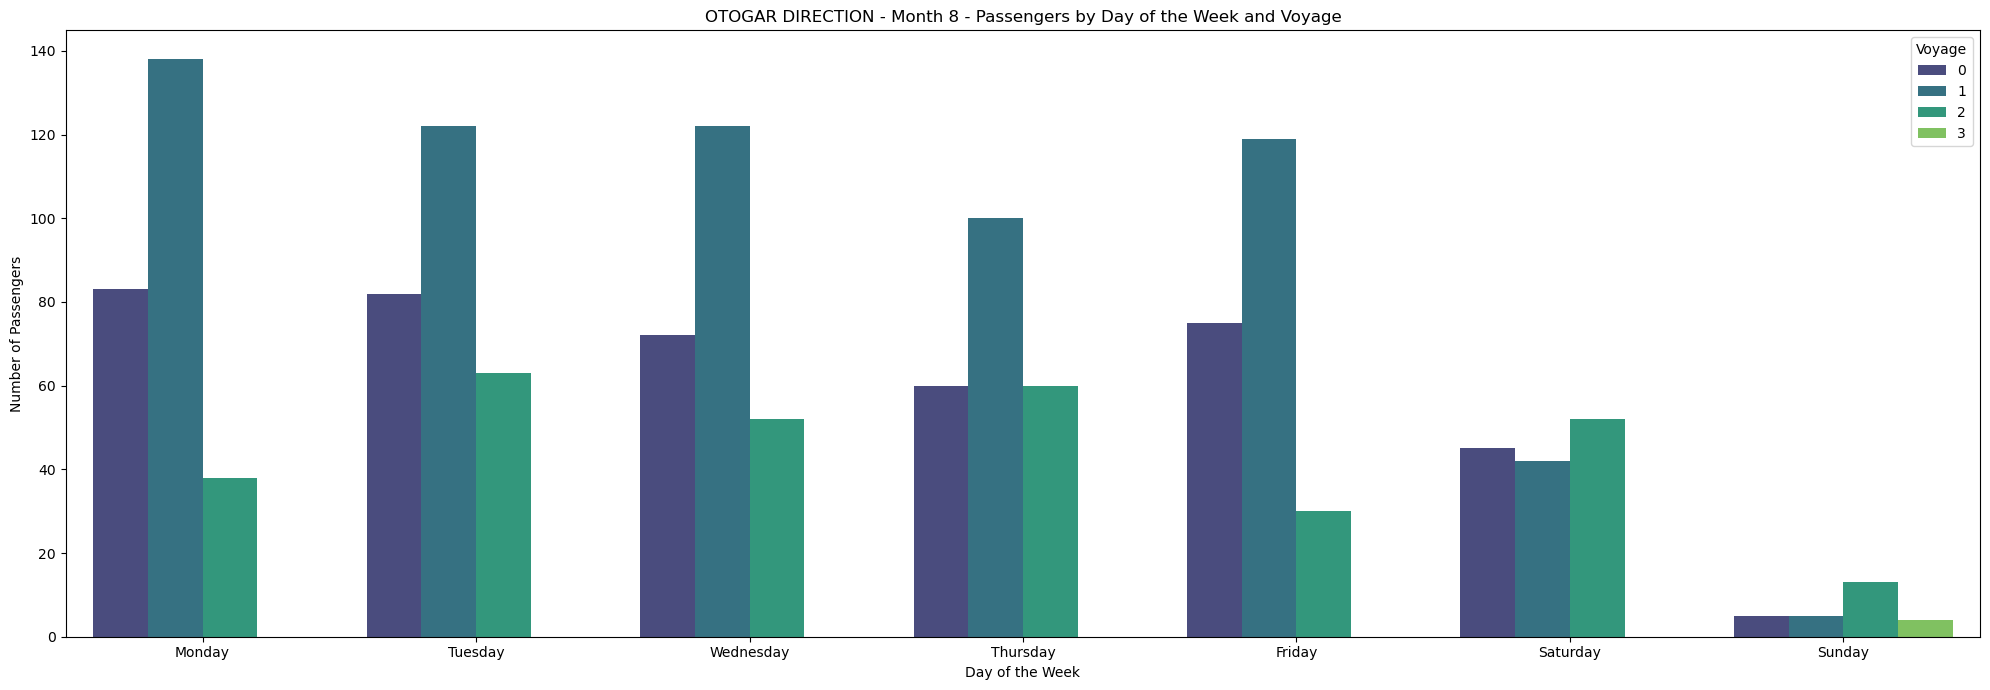

In [495]:
unique_months = otogar_data['month'].unique()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for month in unique_months:
    monthly_data = otogar_data[otogar_data['month'] == month]
    plt.figure(figsize=(20, 7))
    
    passenger_counts = monthly_data.groupby(['day_of_week', 'voyage']).size().reset_index(name='count')
    passenger_counts['day_of_week'] = pd.Categorical(passenger_counts['day_of_week'], categories=ordered_days, ordered=True)
    passenger_counts = passenger_counts.sort_values('day_of_week')
    
    sns.barplot(x="day_of_week", y="count", hue="voyage", data=passenger_counts, palette="viridis")
    plt.title(f'OTOGAR DIRECTION - Month {month} - Passengers by Day of the Week and Voyage')
    plt.ylabel('Number of Passengers')
    plt.xlabel('Day of the Week')
    plt.tight_layout()
    plt.legend(title='Voyage')
    plt.show()


#### Mecidiyeköy Direction

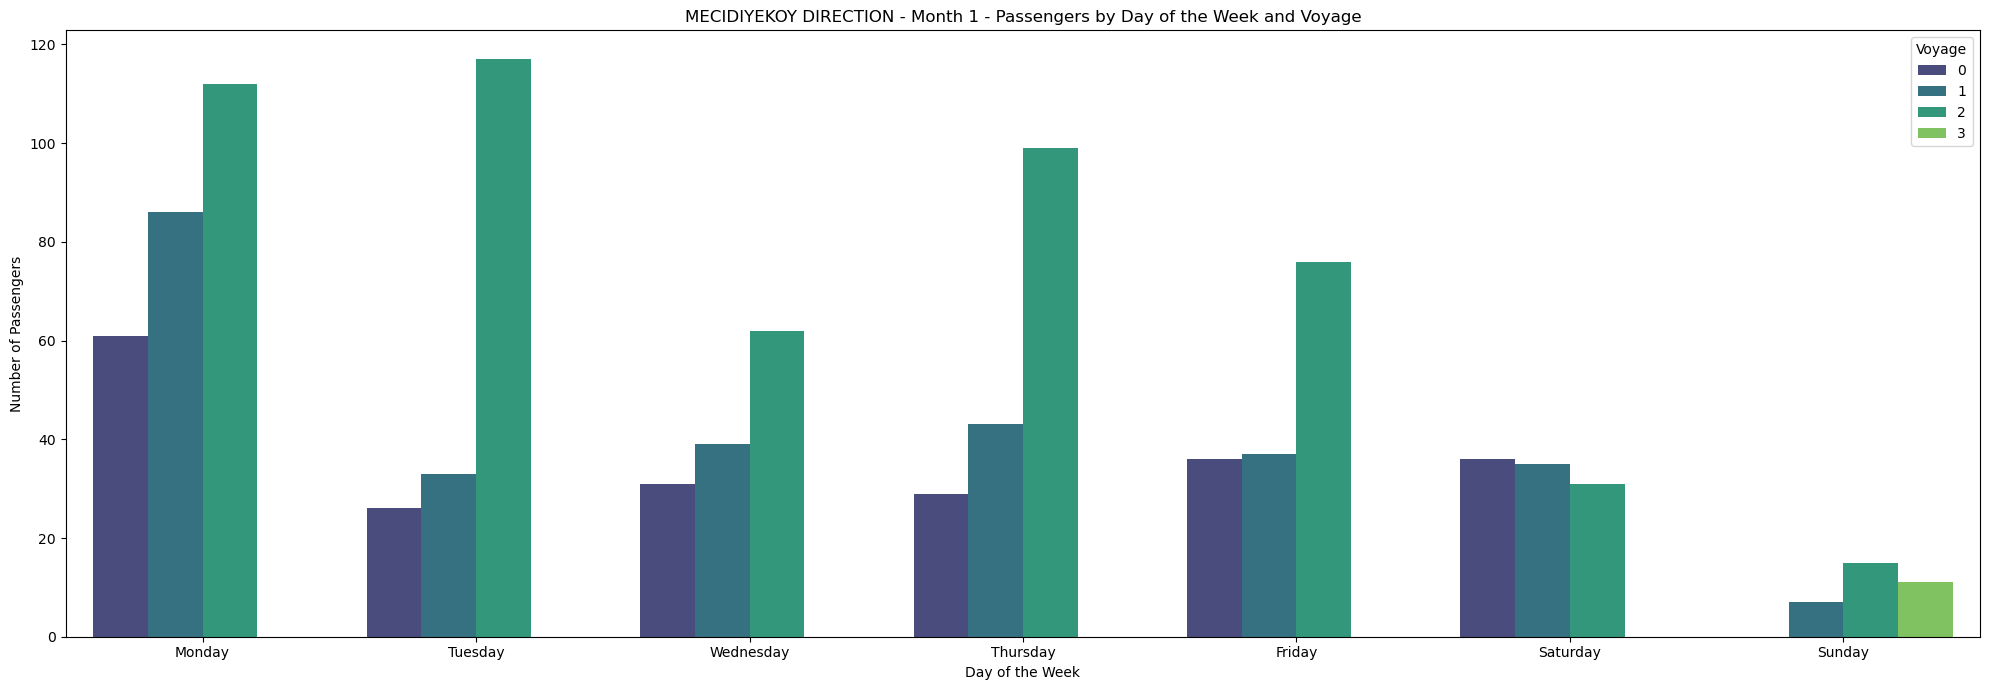

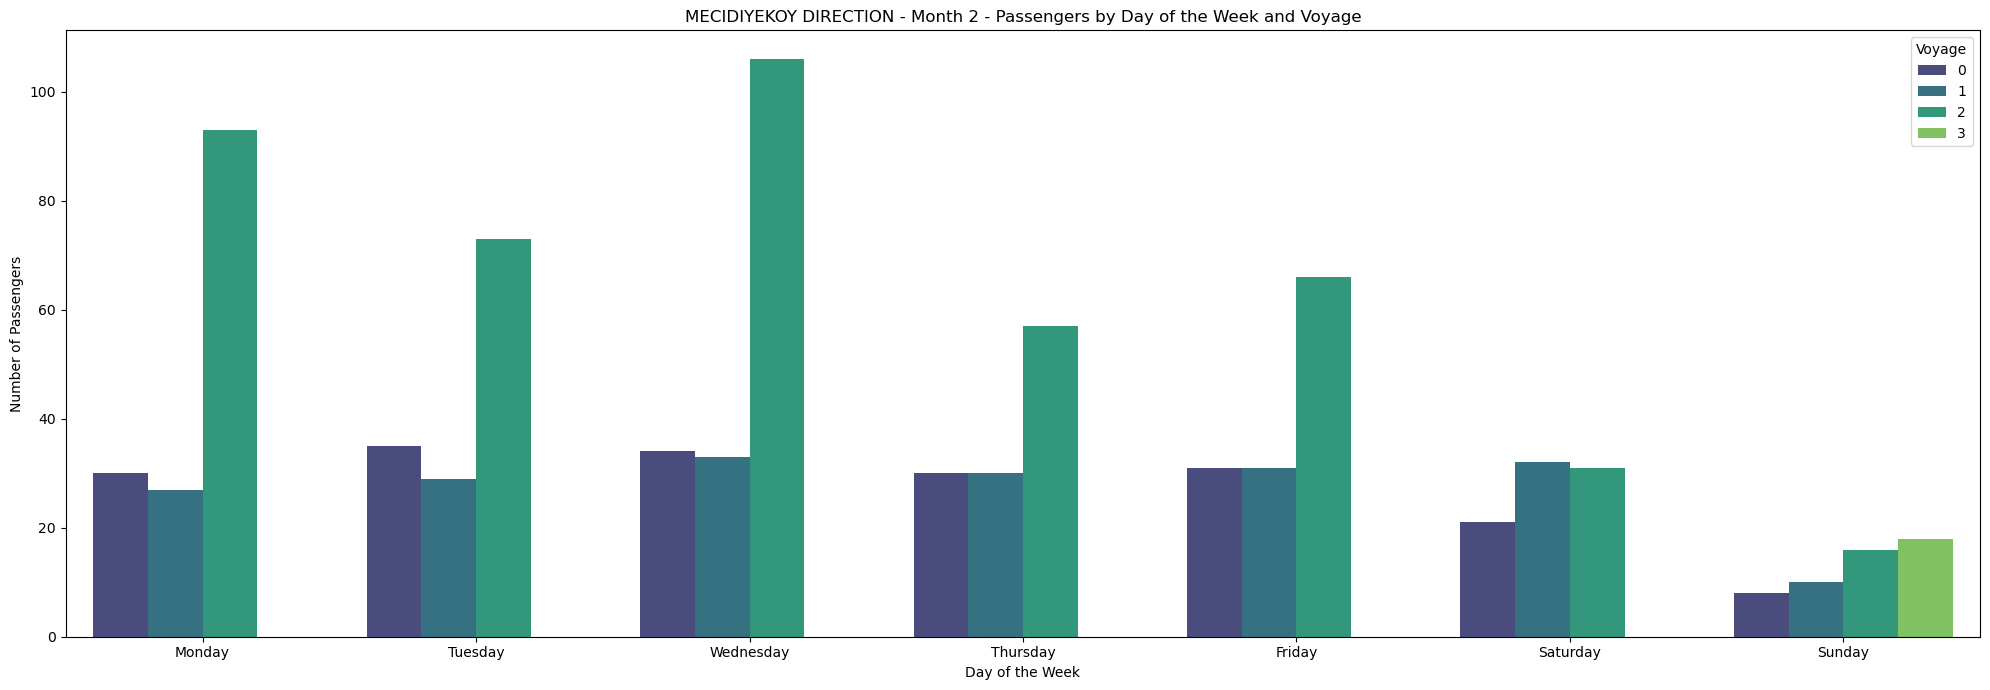

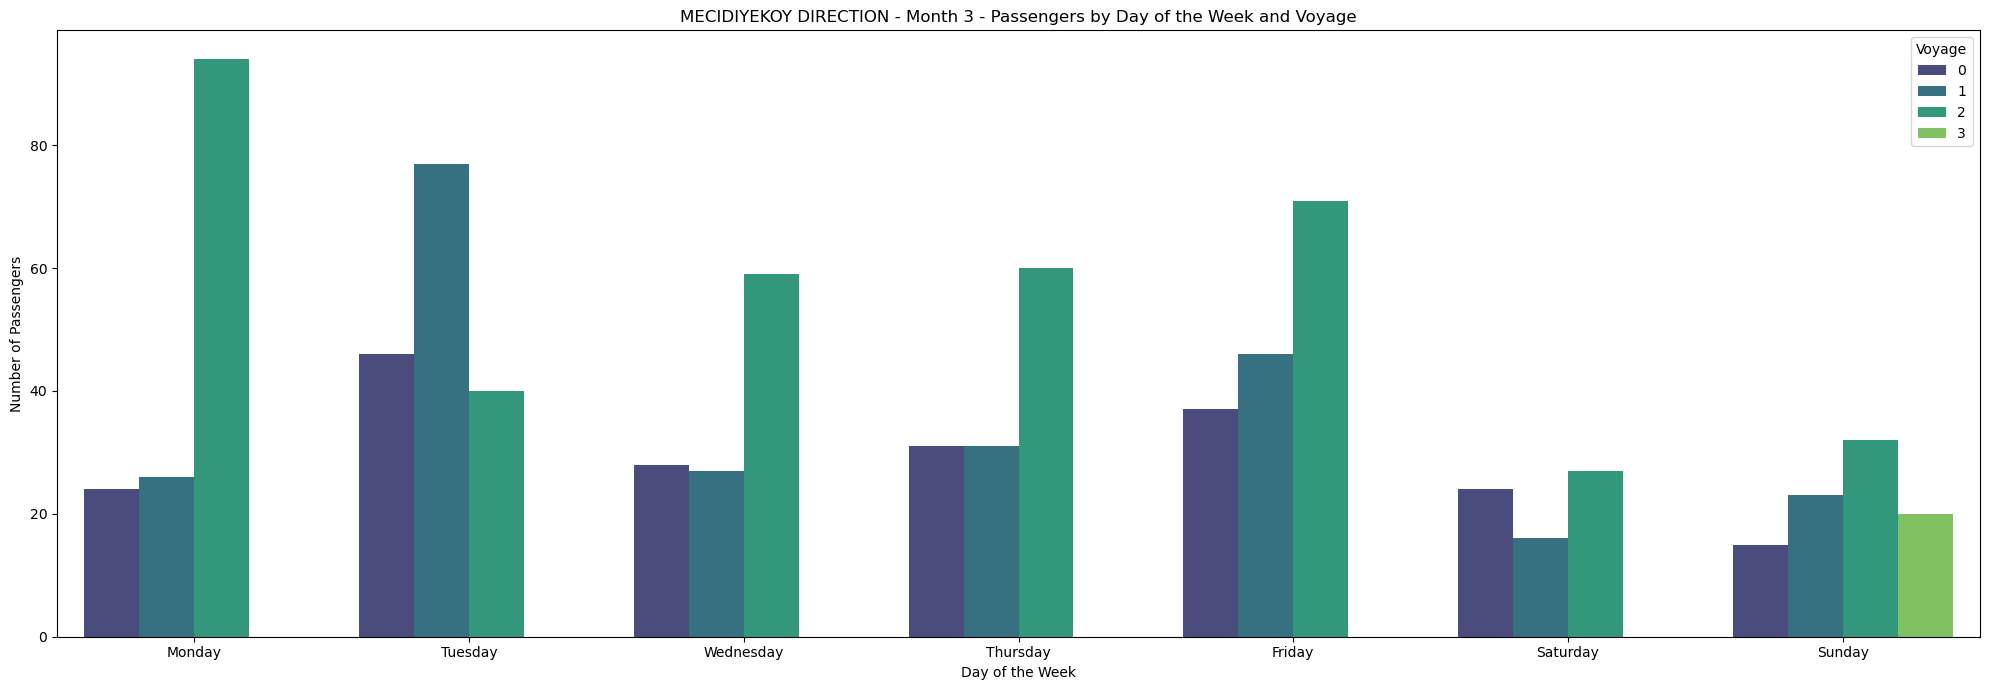

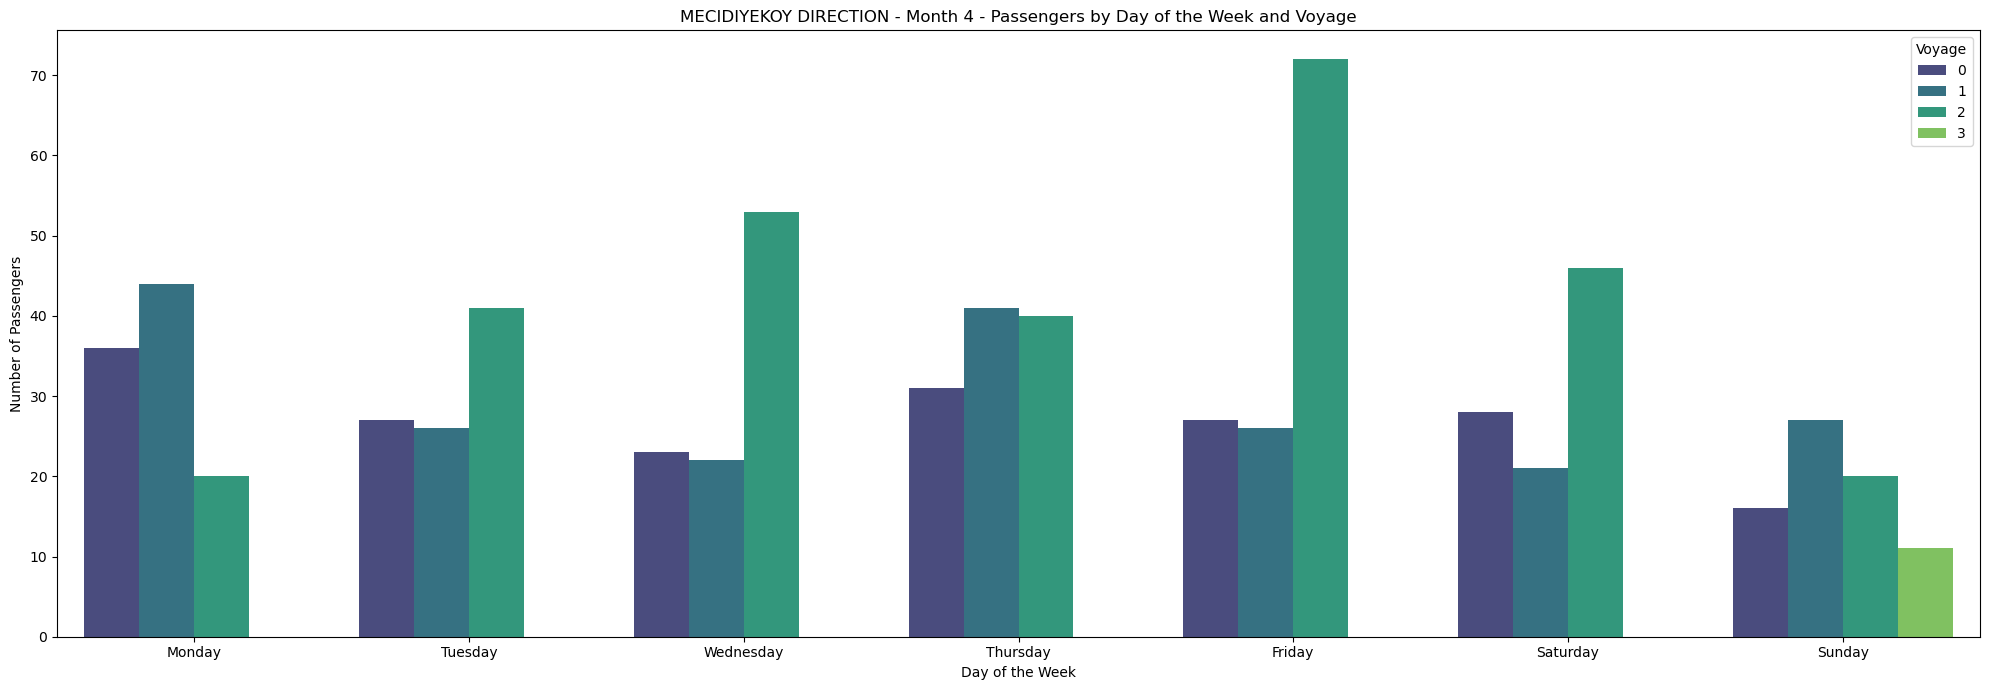

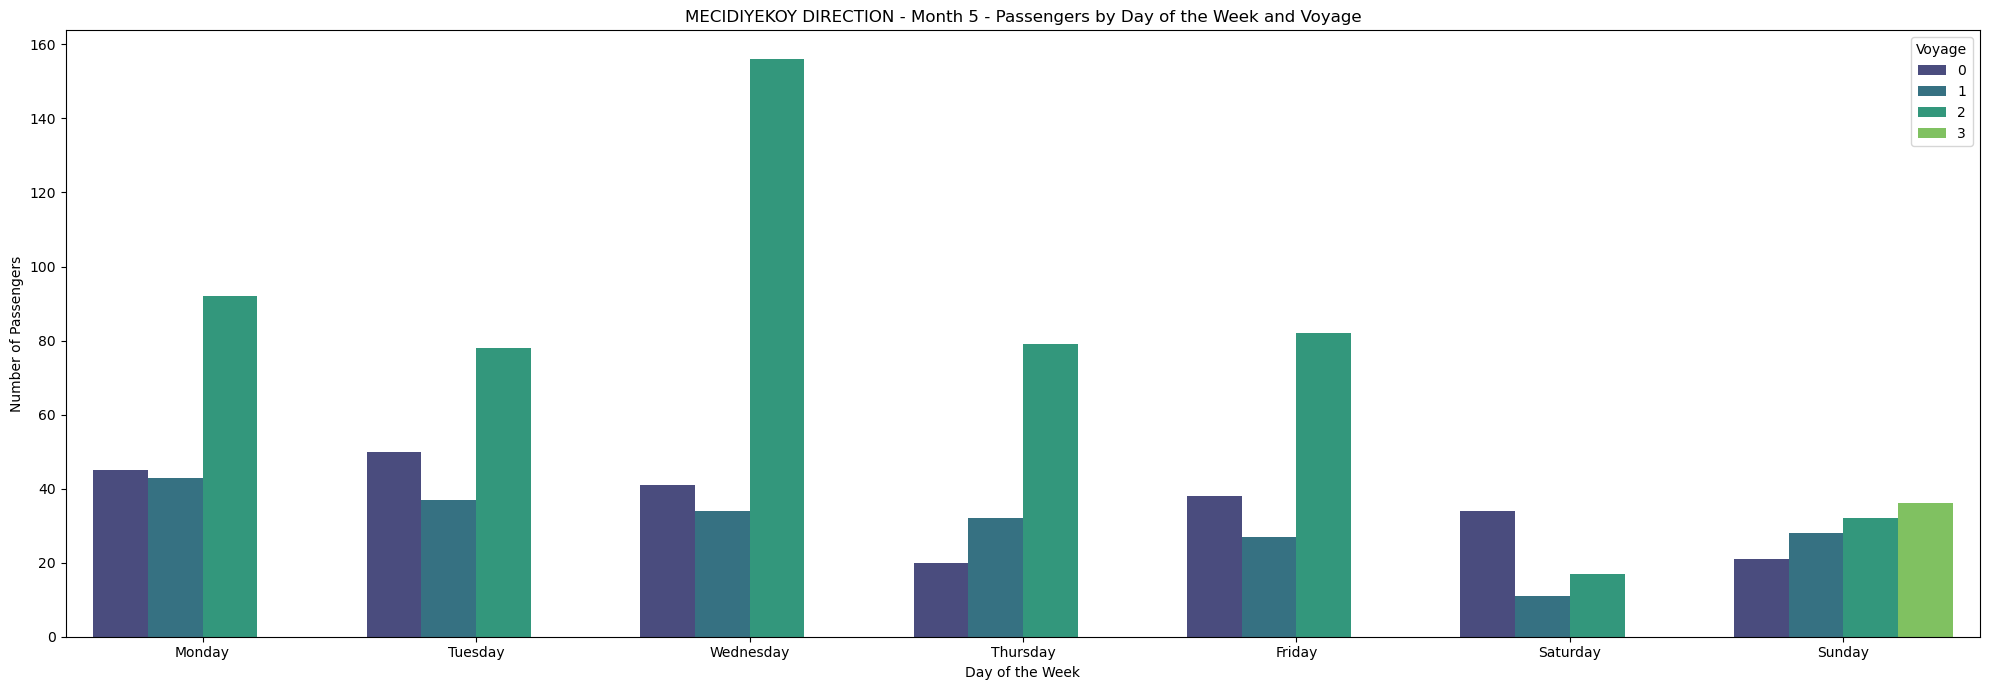

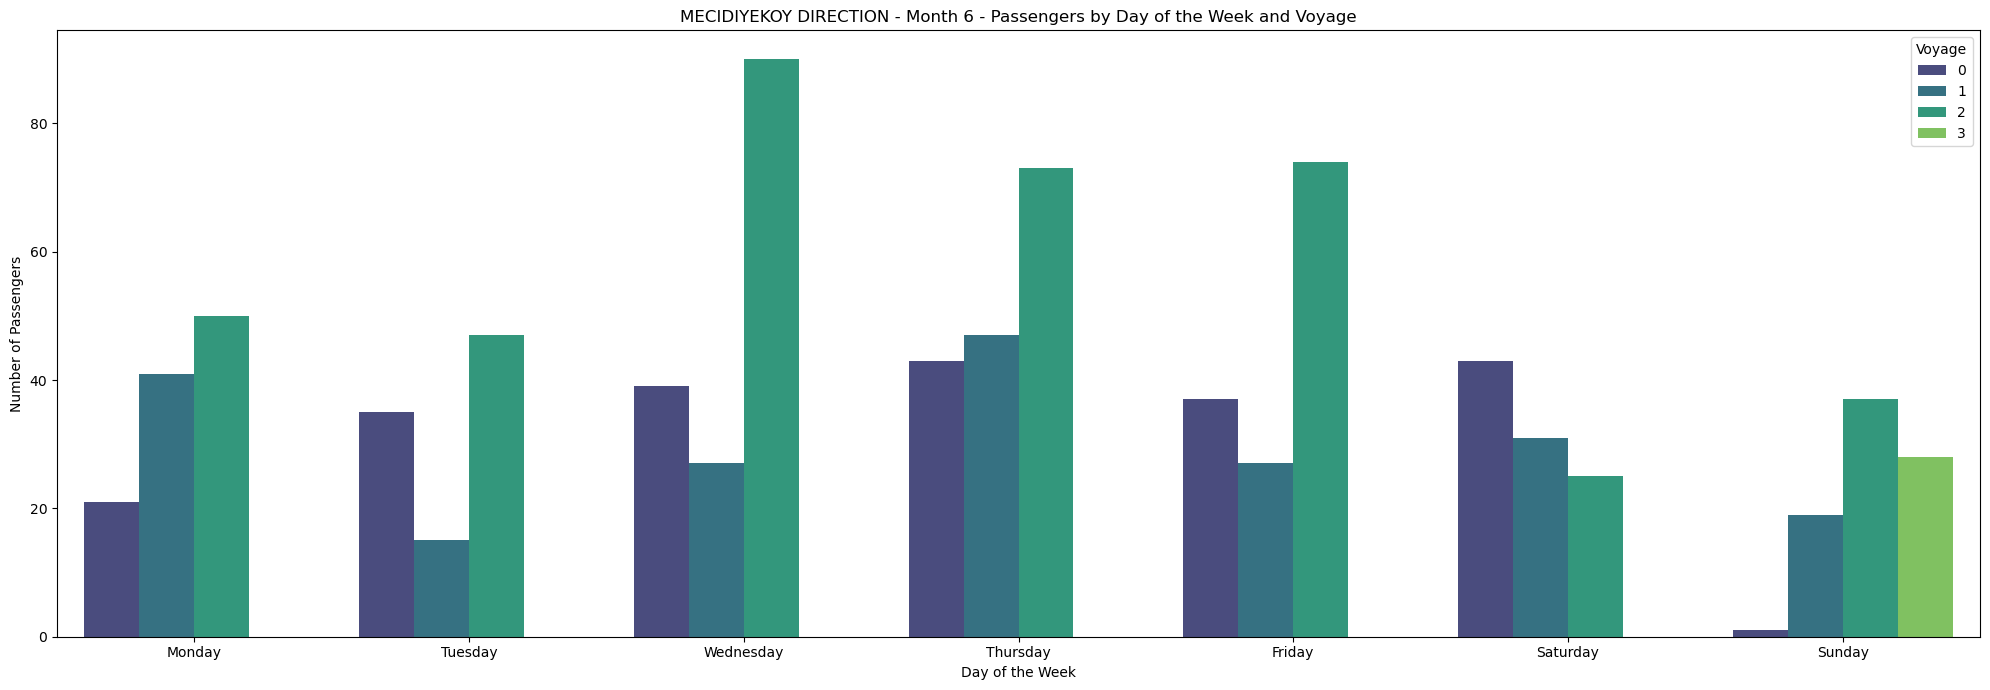

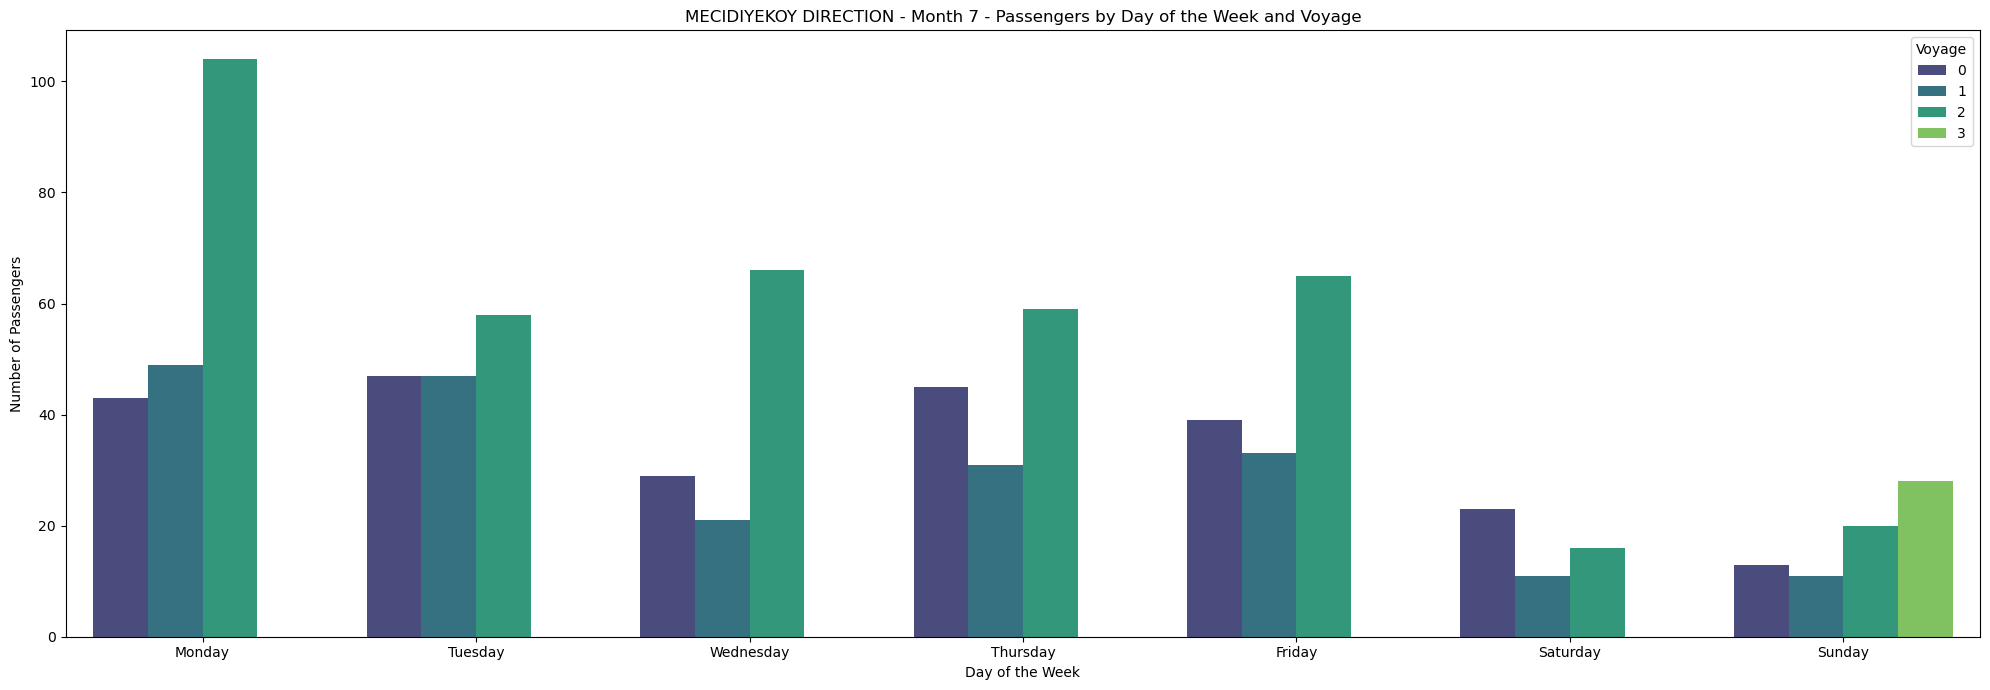

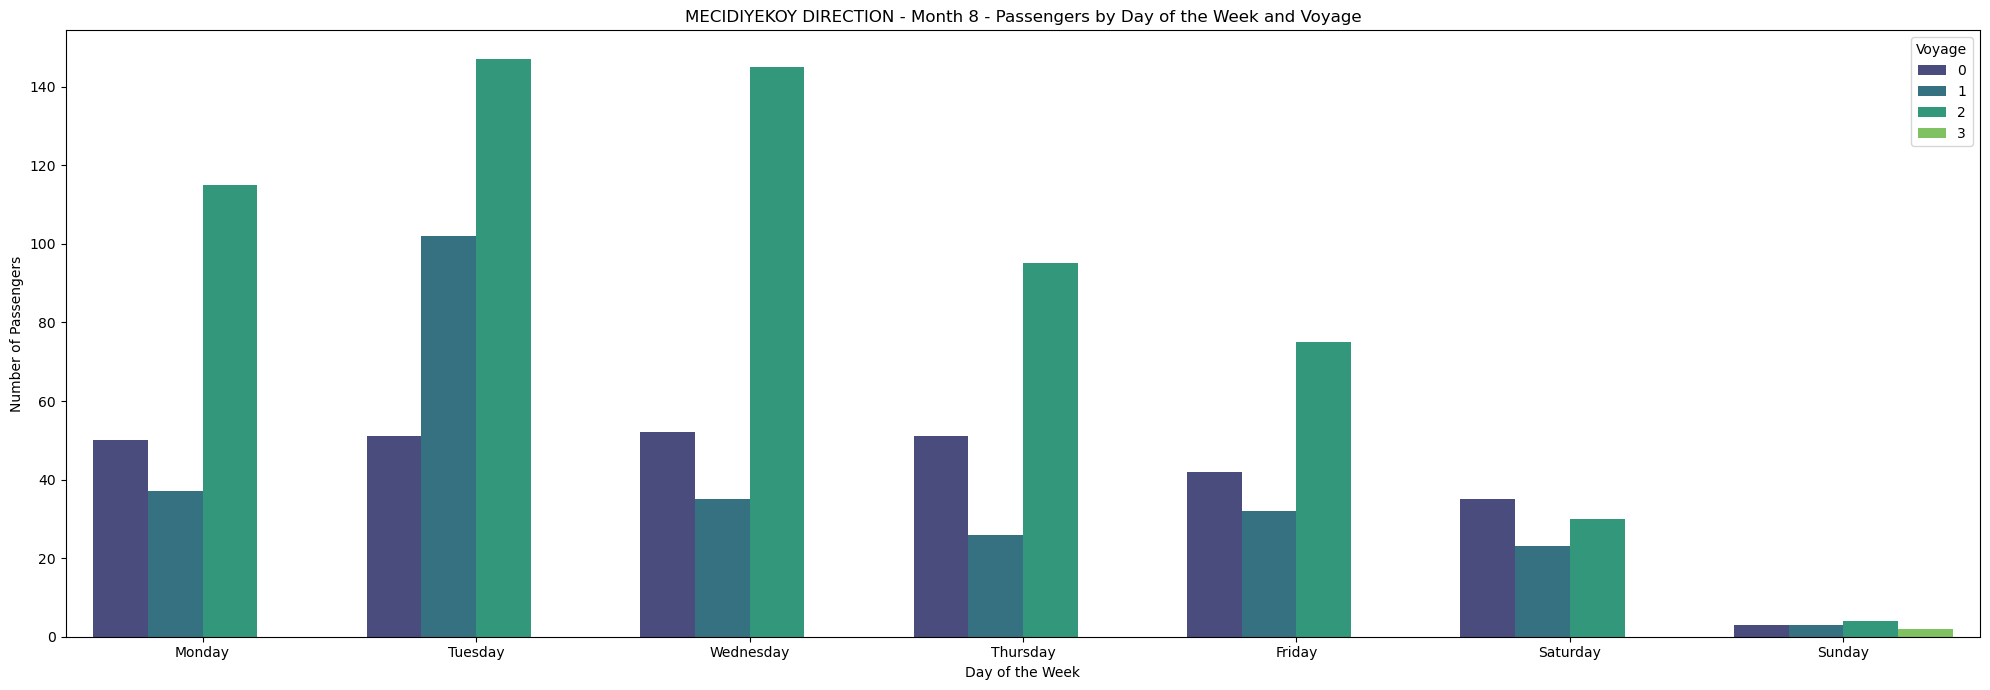

In [496]:
unique_months = mecidiyekoy_data['month'].unique()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for month in unique_months:
    monthly_data = mecidiyekoy_data[mecidiyekoy_data['month'] == month]
    plt.figure(figsize=(20, 7))
    
    passenger_counts = monthly_data.groupby(['day_of_week', 'voyage']).size().reset_index(name='count')
    passenger_counts['day_of_week'] = pd.Categorical(passenger_counts['day_of_week'], categories=ordered_days, ordered=True)
    passenger_counts = passenger_counts.sort_values('day_of_week')
    
    sns.barplot(x="day_of_week", y="count", hue="voyage", data=passenger_counts, palette="viridis")
    plt.title(f'MECIDIYEKOY DIRECTION - Month {month} - Passengers by Day of the Week and Voyage')
    plt.ylabel('Number of Passengers')
    plt.xlabel('Day of the Week')
    plt.tight_layout()
    plt.legend(title='Voyage')
    plt.show()


In [497]:
otogar_data

,transaction_date,small_date,transfer_type,usage_type,bus_stop_id,time,direction,day_of_week,month,voyage
10633,2023-01-02 07:38:23,2023-01-02,Normal,Normal,303461,07:38:23,0,Monday,1,0
26396,2023-01-02 07:38:57,2023-01-02,Normal,Normal,303461,07:38:57,0,Monday,1,0
18102,2023-01-02 07:40:16,2023-01-02,Normal,Normal,303461,07:40:16,0,Monday,1,0
14599,2023-01-02 07:40:19,2023-01-02,Normal,Normal,303461,07:40:19,0,Monday,1,0
5183,2023-01-02 07:44:55,2023-01-02,Normal,Abonman,303461,07:44:55,0,Monday,1,0
...,...,...,...,...,...,...,...,...,...,...
27744,2023-08-30 18:23:03,2023-08-30,Normal,Abonman,118723,18:23:03,0,Wednesday,8,2
22122,2023-08-30 18:26:52,2023-08-30,Normal,Abonman,177621,18:26:52,0,Wednesday,8,2
14184,2023-08-30 18:26:54,2023-08-30,Aktarma,Normal,177621,18:26:54,0,Wednesday,8,2
3313,2023-08-30 18:29:10,2023-08-30,Normal,Normal,121271,18:29:10,0,Wednesday,8,2


### Bus Stop Density

#### Otogar Direction

<Figure size 2000x1000 with 0 Axes>

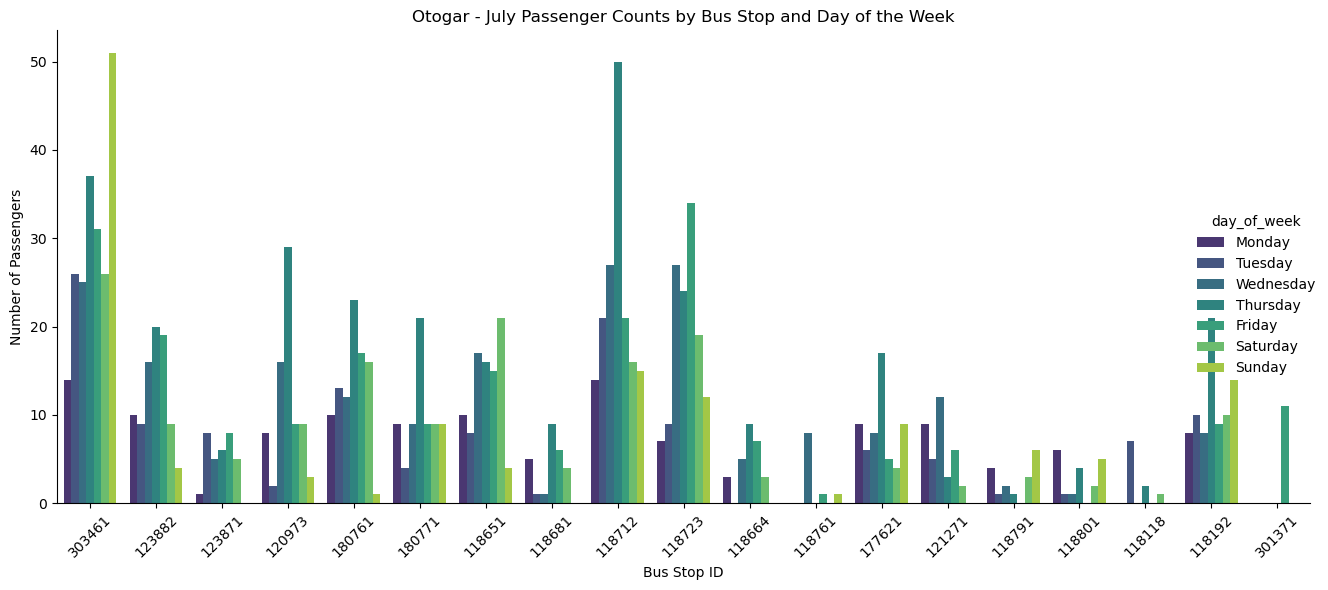

In [498]:
# Analysis for July
selected_month = 6

# Calculating the stop density according to the days of the week in July
otogar_monthly_data = otogar_data[otogar_data['month'] == selected_month]
otogar_counts = otogar_monthly_data[otogar_monthly_data['bus_stop_id'].isin(otogar)].groupby(['day_of_week', 'bus_stop_id']).size().reset_index(name='count')
otogar_counts['bus_stop_id'] = otogar_counts['bus_stop_id'].astype(str) 

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
otogar_counts['day_of_week'] = pd.Categorical(otogar_counts['day_of_week'], categories=ordered_days, ordered=True)

otogar_ordered = [str(i) for i in otogar]
otogar_counts['bus_stop_id'] = pd.Categorical(otogar_counts['bus_stop_id'], categories=otogar_ordered, ordered=True)
otogar_counts = otogar_counts.sort_values('bus_stop_id')

plt.figure(figsize=(20, 10))
sns.catplot(x="bus_stop_id", y="count", hue="day_of_week", data=otogar_counts, kind="bar", height=6, aspect=2, palette="viridis")
plt.title('Otogar - July Passenger Counts by Bus Stop and Day of the Week')
plt.ylabel('Number of Passengers')
plt.xlabel('Bus Stop ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Mecidiyeköy Direction

<Figure size 2000x1000 with 0 Axes>

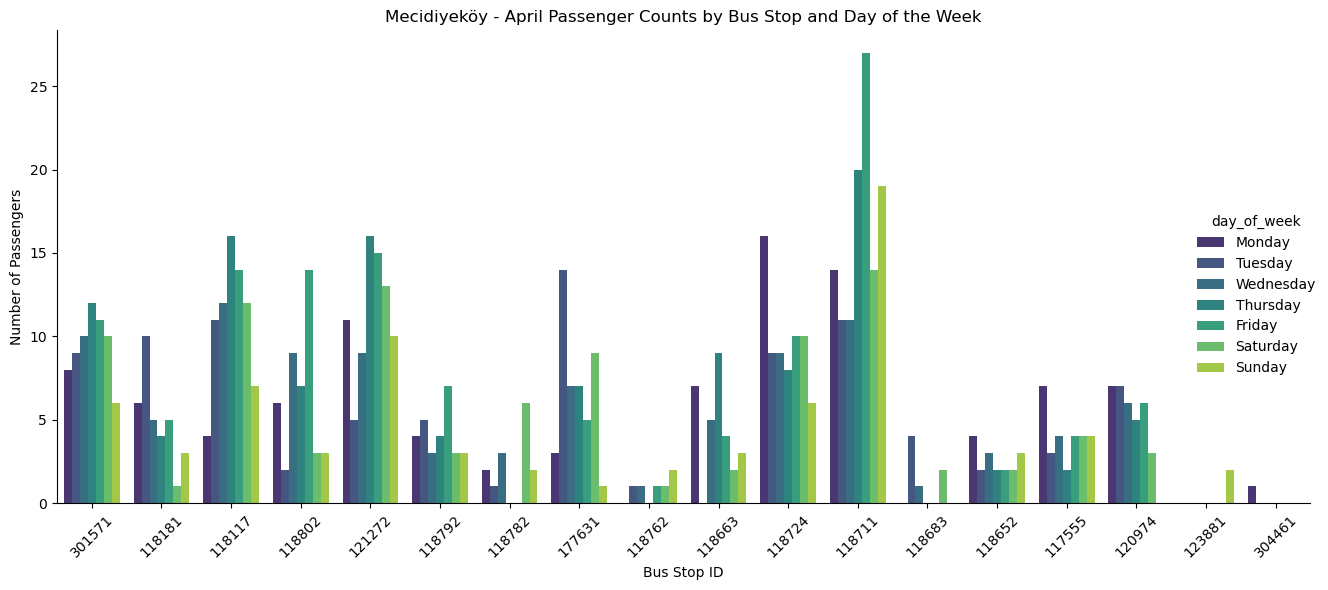

In [499]:
# Analysis for April
selected_month = 4

# Calculating the stop density according to the days of the week in July
mecidiyekoy_monthly_data = mecidiyekoy_data[mecidiyekoy_data['month'] == selected_month]
mecidiyekoy_counts = mecidiyekoy_monthly_data[mecidiyekoy_monthly_data['bus_stop_id'].isin(mecidiyekoy)].groupby(['day_of_week', 'bus_stop_id']).size().reset_index(name='count')
mecidiyekoy_counts['bus_stop_id'] = mecidiyekoy_counts['bus_stop_id'].astype(str) 

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mecidiyekoy_counts['day_of_week'] = pd.Categorical(mecidiyekoy_counts['day_of_week'], categories=ordered_days, ordered=True)

mecidiyekoy_ordered = [str(i) for i in mecidiyekoy]
mecidiyekoy_counts['bus_stop_id'] = pd.Categorical(mecidiyekoy_counts['bus_stop_id'], categories=mecidiyekoy_ordered, ordered=True)
mecidiyekoy_counts = mecidiyekoy_counts.sort_values('bus_stop_id')

plt.figure(figsize=(20, 10))
sns.catplot(x="bus_stop_id", y="count", hue="day_of_week", data=mecidiyekoy_counts, kind="bar", height=6, aspect=2, palette="viridis")
plt.title('Mecidiyeköy - April Passenger Counts by Bus Stop and Day of the Week')
plt.ylabel('Number of Passengers')
plt.xlabel('Bus Stop ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Voyage Prediction

## Otogar Direction

### Weekdays

In [500]:
oto_passengers_weekdays = pd.DataFrame(otogar_data_w.groupby(['month', 'day_of_week']).size().reset_index(name='count'))
oto_passengers_weekdays

,month,day_of_week,count
0,1,Friday,132
1,1,Monday,211
2,1,Thursday,291
3,1,Tuesday,220
4,1,Wednesday,246
5,2,Friday,236
6,2,Monday,239
7,2,Thursday,236
8,2,Tuesday,207
9,2,Wednesday,223


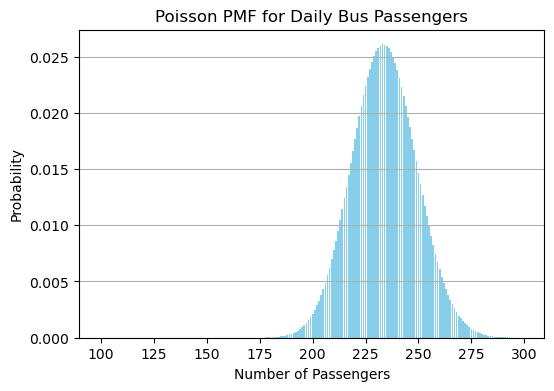

In [501]:
daily_passenger_counts = oto_passengers_weekdays.groupby(['month', 'day_of_week']).sum()
lambda_value = daily_passenger_counts.mean()

# there are about 200 passengers per day for weekdays
prob_200_passengers = poisson.pmf(200, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity

# Define a range of passenger counts
k_values = np.arange(100, 300)  

# Calculate the PMF for each passenger count
pmf_values = poisson.pmf(k_values, lambda_value)

plt.figure(figsize=(6, 4))
plt.bar(k_values, pmf_values, color='skyblue')
plt.xlabel('Number of Passengers')
plt.ylabel('Probability')
plt.title('Poisson PMF for Daily Bus Passengers')
plt.grid(axis='y')
plt.show()

In [502]:
# prediction of expected voyages
bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
expected_buses_needed

count    3.341429
dtype: float64

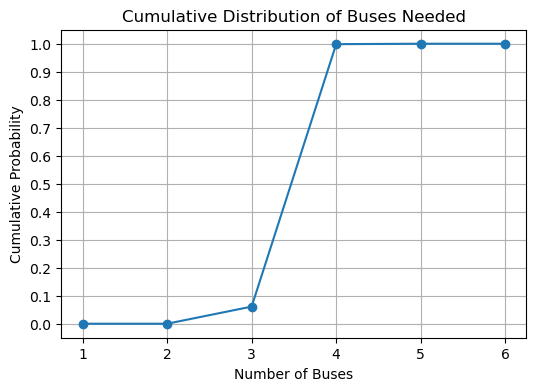

In [503]:
# Calculate the maximum number of buses you might need on a very busy day
max_buses = int(np.ceil(lambda_value * 1.5 / bus_capacity))

# Calculate the cumulative probability for each number of buses
bus_counts = np.arange(1, max_buses + 1)
cumulative_probs = [poisson.cdf(n * bus_capacity, lambda_value) for n in bus_counts]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(bus_counts, cumulative_probs, marker='o', linestyle='-')
plt.xlabel('Number of Buses')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Buses Needed')
plt.grid(True)
plt.xticks(bus_counts)
plt.yticks(np.linspace(0, 1, 11))
plt.show()

### Saturday

In [504]:
oto_passengers_sa = pd.DataFrame(otogar_data_sa.groupby(['month', 'day_of_week']).size().reset_index(name='count'))
oto_passengers_sa

,month,day_of_week,count
0,1,Saturday,153
1,2,Saturday,157
2,3,Saturday,151
3,4,Saturday,164
4,5,Saturday,121
5,6,Saturday,159
6,7,Saturday,169
7,8,Saturday,143


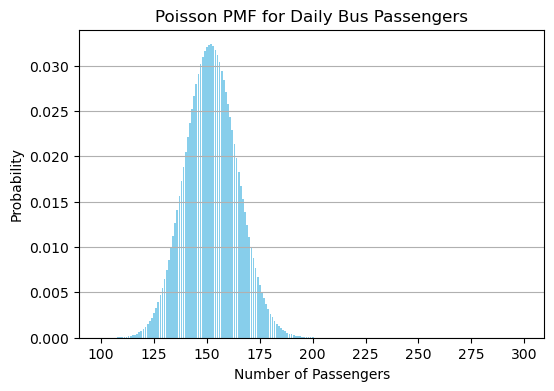

In [505]:
daily_passenger_counts = oto_passengers_sa.groupby(['month', 'day_of_week']).sum()
lambda_value = daily_passenger_counts.mean()

# there are about 150 passengers per day for saturday
prob_150_passengers = poisson.pmf(150, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity

# Define a range of passenger counts
k_values = np.arange(100, 300)  

# Calculate the PMF for each passenger count
pmf_values = poisson.pmf(k_values, lambda_value)

plt.figure(figsize=(6, 4))
plt.bar(k_values, pmf_values, color='skyblue')
plt.xlabel('Number of Passengers')
plt.ylabel('Probability')
plt.title('Poisson PMF for Daily Bus Passengers')
plt.grid(axis='y')
plt.show()

In [506]:
# prediction of expected voyages
bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
expected_buses_needed

count    2.173214
dtype: float64

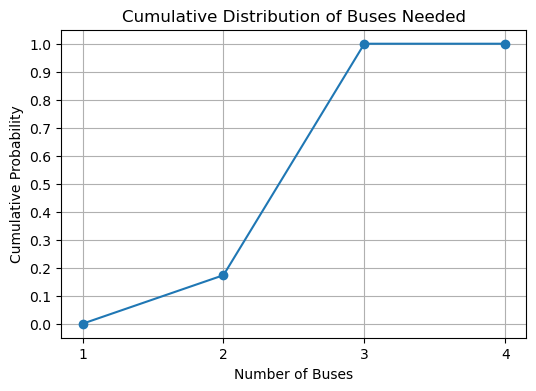

In [507]:
# Calculate the maximum number of buses you might need on a very busy day
max_buses = int(np.ceil(lambda_value * 1.5 / bus_capacity))

# Calculate the cumulative probability for each number of buses
bus_counts = np.arange(1, max_buses + 1)
cumulative_probs = [poisson.cdf(n * bus_capacity, lambda_value) for n in bus_counts]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(bus_counts, cumulative_probs, marker='o', linestyle='-')
plt.xlabel('Number of Buses')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Buses Needed')
plt.grid(True)
plt.xticks(bus_counts)
plt.yticks(np.linspace(0, 1, 11))
plt.show()

### Sunday

In [508]:
oto_passengers_su = pd.DataFrame(otogar_data_su.groupby(['month', 'day_of_week']).size().reset_index(name='count'))
oto_passengers_su

,month,day_of_week,count
0,1,Sunday,28
1,2,Sunday,114
2,3,Sunday,163
3,4,Sunday,240
4,5,Sunday,170
5,6,Sunday,134
6,7,Sunday,94
7,8,Sunday,27


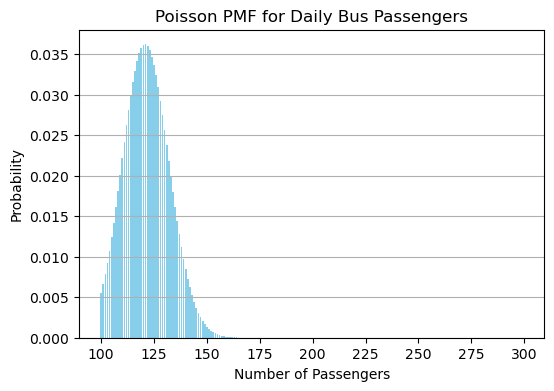

In [509]:
daily_passenger_counts = oto_passengers_su.groupby(['month', 'day_of_week']).sum()
lambda_value = daily_passenger_counts.mean()

# there are about 150 passengers per day for sunday
prob_150_passengers = poisson.pmf(150, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity

# Define a range of passenger counts
k_values = np.arange(100, 300)  

# Calculate the PMF for each passenger count
pmf_values = poisson.pmf(k_values, lambda_value)

plt.figure(figsize=(6, 4))
plt.bar(k_values, pmf_values, color='skyblue')
plt.xlabel('Number of Passengers')
plt.ylabel('Probability')
plt.title('Poisson PMF for Daily Bus Passengers')
plt.grid(axis='y')
plt.show()

In [510]:
# prediction of expected voyages
bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
expected_buses_needed

count    1.732143
dtype: float64

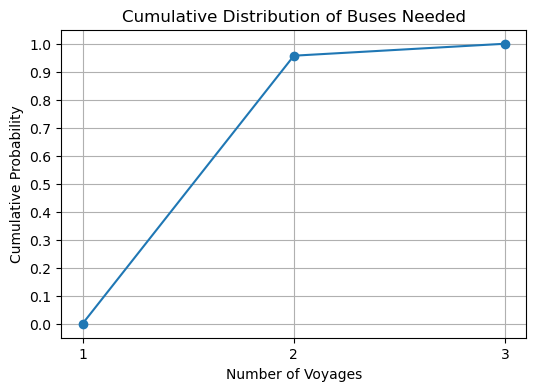

In [511]:
# Calculate the maximum number of buses you might need on a very busy day
max_buses = int(np.ceil(lambda_value * 1.5 / bus_capacity))

# Calculate the cumulative probability for each number of buses
bus_counts = np.arange(1, max_buses + 1)
cumulative_probs = [poisson.cdf(n * bus_capacity, lambda_value) for n in bus_counts]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(bus_counts, cumulative_probs, marker='o', linestyle='-')
plt.xlabel('Number of Voyages')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Buses Needed')
plt.grid(True)
plt.xticks(bus_counts)
plt.yticks(np.linspace(0, 1, 11))
plt.show()

### Result for Otogar Direction

In [512]:
results = pd.DataFrame({'Days': ['Weekdays', 'Saturday', 'Sunday'], 
                        'Current Voyages' : [3, 3, 4], 
                        'Expected Voyages':[3.341429, 2.173214, 1.732143],
                        'Required Voyages':[4, 3, 2]})
results.index = results['Days']
results

,Days,Current Voyages,Expected Voyages,Required Voyages
Days,,,,
Weekdays,Weekdays,3,3.341429,4
Saturday,Saturday,3,2.173214,3
Sunday,Sunday,4,1.732143,2


## Mecidiyeköy Direction

### Weekdays

In [513]:
meci_passengers_weekdays = pd.DataFrame(mecidiyekoy_data_w.groupby(['month', 'day_of_week']).size().reset_index(name='count'))
meci_passengers_weekdays

,month,day_of_week,count
0,1,Friday,152
1,1,Monday,276
2,1,Thursday,180
3,1,Tuesday,182
4,1,Wednesday,137
5,2,Friday,136
6,2,Monday,160
7,2,Thursday,119
8,2,Tuesday,143
9,2,Wednesday,279


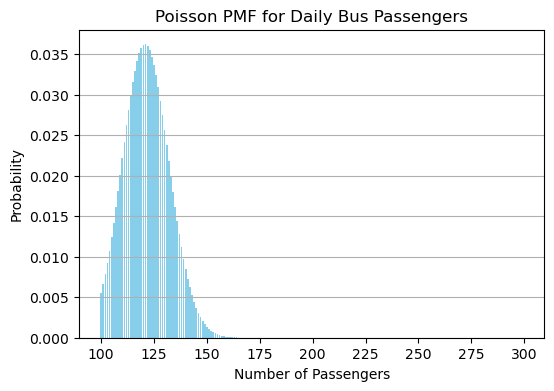

In [514]:
lambda_value = daily_passenger_counts.mean()

# there are about 200 passengers per day for weekdays
prob_200_passengers = poisson.pmf(200, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity

# Define a range of passenger counts
k_values = np.arange(100, 300) 

# Calculate the PMF for each passenger count
pmf_values = poisson.pmf(k_values, lambda_value)

plt.figure(figsize=(6, 4))
plt.bar(k_values, pmf_values, color='skyblue')
plt.xlabel('Number of Passengers')
plt.ylabel('Probability')
plt.title('Poisson PMF for Daily Bus Passengers')
plt.grid(axis='y')
plt.show()

In [515]:
# prediction of expected voyages
bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
expected_buses_needed

count    1.732143
dtype: float64

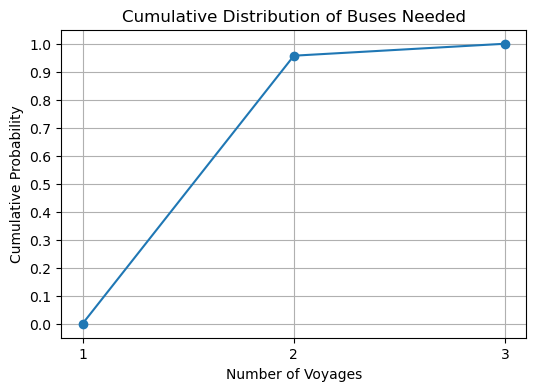

In [516]:
# Calculate the maximum number of buses you might need on a very busy day
max_buses = int(np.ceil(lambda_value * 1.5 / bus_capacity))

# Calculate the cumulative probability for each number of buses
bus_counts = np.arange(1, max_buses + 1)
cumulative_probs = [poisson.cdf(n * bus_capacity, lambda_value) for n in bus_counts]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(bus_counts, cumulative_probs, marker='o', linestyle='-')
plt.xlabel('Number of Voyages')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Buses Needed')
plt.grid(True)
plt.xticks(bus_counts)
plt.yticks(np.linspace(0, 1, 11))
plt.show()

### Saturday

In [517]:
meci_passengers_sa = pd.DataFrame(mecidiyekoy_data_sa.groupby(['month', 'day_of_week']).size().reset_index(name='count'))
meci_passengers_sa

,month,day_of_week,count
0,1,Saturday,102
1,2,Saturday,86
2,3,Saturday,68
3,4,Saturday,98
4,5,Saturday,63
5,6,Saturday,101
6,7,Saturday,54
7,8,Saturday,92


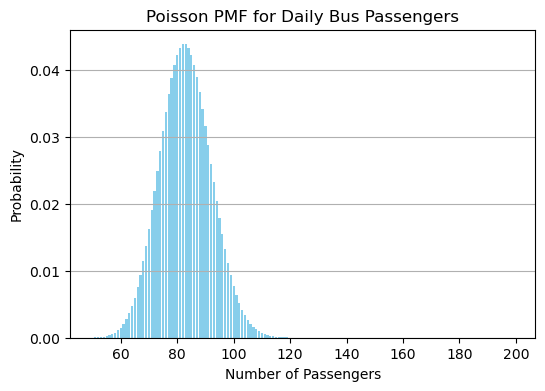

In [518]:
daily_passenger_counts = meci_passengers_sa.groupby(['month', 'day_of_week']).sum()
lambda_value = daily_passenger_counts.mean()

# there are about 70 passengers per day for saturday
prob_150_passengers = poisson.pmf(70, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity

# Define a range of passenger counts
k_values = np.arange(50, 200) 

# Calculate the PMF for each passenger count
pmf_values = poisson.pmf(k_values, lambda_value)

plt.figure(figsize=(6, 4))
plt.bar(k_values, pmf_values, color='skyblue')
plt.xlabel('Number of Passengers')
plt.ylabel('Probability')
plt.title('Poisson PMF for Daily Bus Passengers')
plt.grid(axis='y')
plt.show()

In [519]:
# prediction of expected voyages
bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
expected_buses_needed

count    1.185714
dtype: float64

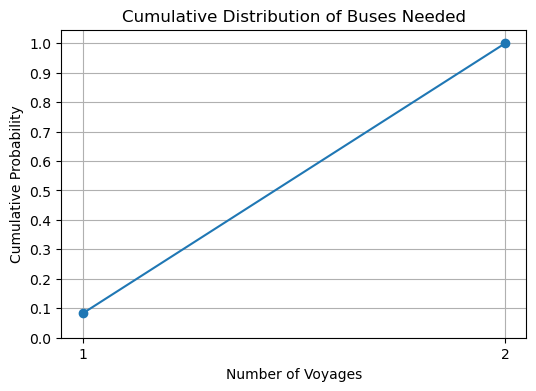

In [520]:
# Calculate the maximum number of buses you might need on a very busy day
max_buses = int(np.ceil(lambda_value * 1.5 / bus_capacity))

# Calculate the cumulative probability for each number of buses
bus_counts = np.arange(1, max_buses + 1)
cumulative_probs = [poisson.cdf(n * bus_capacity, lambda_value) for n in bus_counts]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(bus_counts, cumulative_probs, marker='o', linestyle='-')
plt.xlabel('Number of Voyages')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Buses Needed')
plt.grid(True)
plt.xticks(bus_counts)
plt.yticks(np.linspace(0, 1, 11))
plt.show()

In [521]:
meci_passengers_su = pd.DataFrame(mecidiyekoy_data_su.groupby(['month', 'day_of_week']).size().reset_index(name='count'))
meci_passengers_su

,month,day_of_week,count
0,1,Sunday,33
1,2,Sunday,54
2,3,Sunday,90
3,4,Sunday,75
4,5,Sunday,118
5,6,Sunday,85
6,7,Sunday,73
7,8,Sunday,12


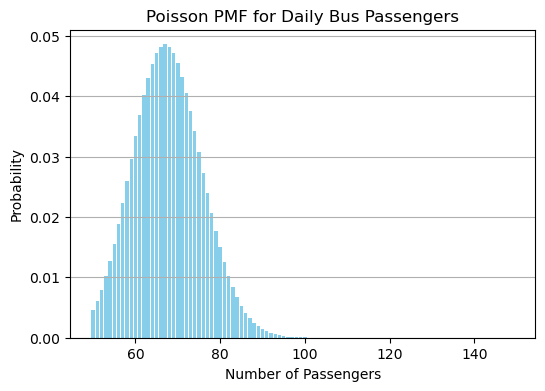

In [522]:
daily_passenger_counts = meci_passengers_su.groupby(['month', 'day_of_week']).sum()
lambda_value = daily_passenger_counts.mean()

# there are about 80 passengers per day for sunday
prob_150_passengers = poisson.pmf(80, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity

# Define a range of passenger counts
k_values = np.arange(50, 150) 

# Calculate the PMF for each passenger count
pmf_values = poisson.pmf(k_values, lambda_value)

plt.figure(figsize=(6, 4))
plt.bar(k_values, pmf_values, color='skyblue')
plt.xlabel('Number of Passengers')
plt.ylabel('Probability')
plt.title('Poisson PMF for Daily Bus Passengers')
plt.grid(axis='y')
plt.show()

In [523]:
# prediction of expected voyages
bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
expected_buses_needed

count    0.964286
dtype: float64

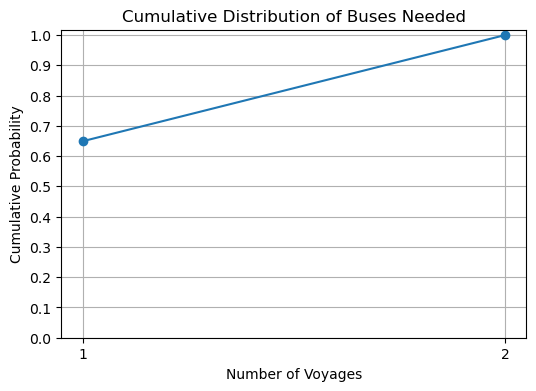

In [524]:
# Calculate the maximum number of buses you might need on a very busy day
max_buses = int(np.ceil(lambda_value * 1.5 / bus_capacity))

# Calculate the cumulative probability for each number of buses
bus_counts = np.arange(1, max_buses + 1)
cumulative_probs = [poisson.cdf(n * bus_capacity, lambda_value) for n in bus_counts]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(bus_counts, cumulative_probs, marker='o', linestyle='-')
plt.xlabel('Number of Voyages')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Buses Needed')
plt.grid(True)
plt.xticks(bus_counts)
plt.yticks(np.linspace(0, 1, 11))
plt.show()

### Results for Mecidiyeköy Direction

In [525]:
results = pd.DataFrame({'Days': ['Weekdays', 'Saturday', 'Sunday'], 
                        'Current Voyages' : [3, 3, 4], 
                        'Expected Voyages':[2.323929, 1.185714, 0.964286],
                        'Required Voyages':[3, 2, 1]})
results.index = results['Days']
results

,Days,Current Voyages,Expected Voyages,Required Voyages
Days,,,,
Weekdays,Weekdays,3,2.323929,3
Saturday,Saturday,3,1.185714,2
Sunday,Sunday,4,0.964286,1


# Voyage Time Prediction

In [526]:
def get_peak_times(data, required_num_times):
    hourly_counts = data.groupby(data['transaction_date'].dt.hour).size()
    peak_hours = hourly_counts.nlargest(required_num_times).index.sort_values().tolist()

    # Eğer yeterli sefer saati yoksa, en yoğun saatler arasına ek seferler ekle
    while len(peak_hours) < required_num_times:
        diffs = [(peak_hours[i+1] - peak_hours[i], i) for i in range(len(peak_hours)-1)]
        max_diff = max(diffs, key=lambda x: x[0])
        new_hour = (peak_hours[max_diff[1]] + peak_hours[max_diff[1] + 1]) // 2
        peak_hours.insert(max_diff[1] + 1, new_hour)

    # Her saat için en yoğun dakika
    peak_times = []
    for hour in peak_hours:
        minute_counts = data[data['transaction_date'].dt.hour == hour].groupby(data['transaction_date'].dt.minute).size()
        peak_minute = minute_counts.idxmax()
        peak_times.append((hour, peak_minute))

    return [f"{hour}:{str(minute).zfill(2)}" for hour, minute in peak_times]

## Otogar Direction

In [527]:
peak_weekday_times = get_peak_times(otogar_data_w, 4)
peak_saturday_times = get_peak_times(otogar_data_sa, 3)
peak_sunday_times = get_peak_times(otogar_data_su, 2)

print("Peak Weekday Times:", peak_weekday_times)
print("Peak Saturday Times:", peak_saturday_times)
print("Peak Sunday Times:", peak_sunday_times)


Peak Weekday Times: ['6:22', '7:52', '8:26', '18:31']
Peak Saturday Times: ['7:51', '8:09', '18:25']
Peak Sunday Times: ['15:37', '17:08']


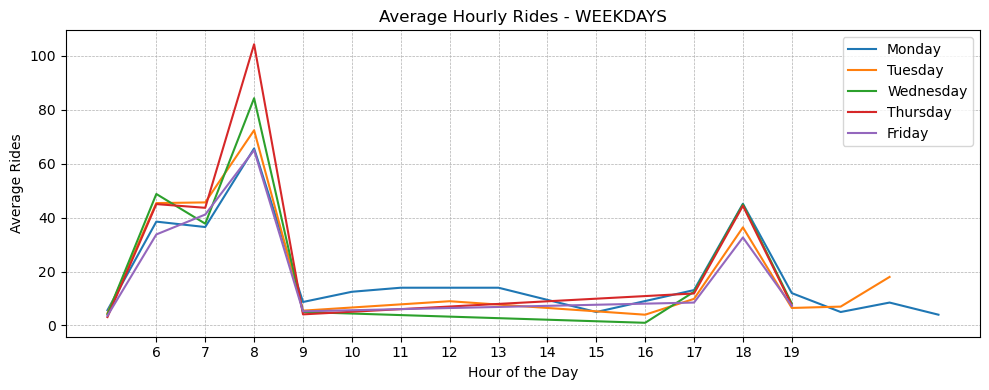

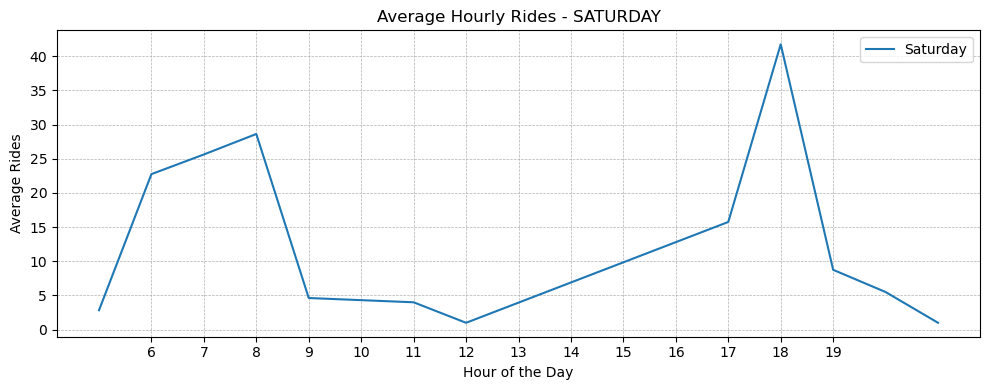

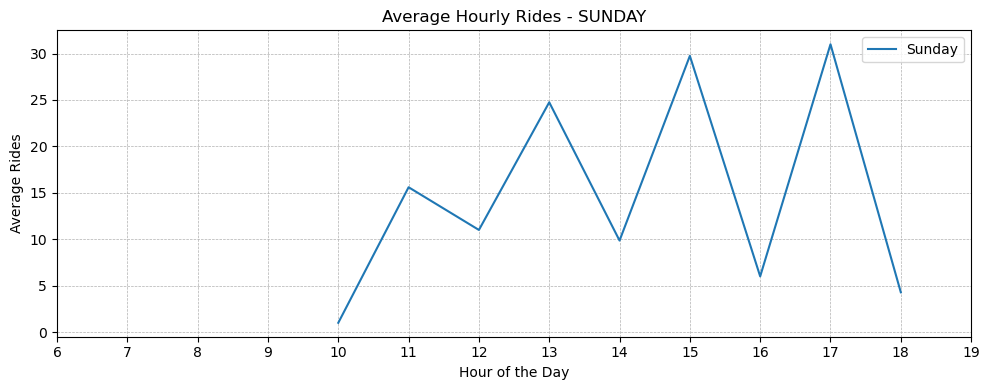

In [528]:
otogar_data_w['hour'] = otogar_data_w['transaction_date'].dt.hour
hourly_avg = otogar_data_w.groupby(['month', 'day_of_week', 'hour']).size().groupby(level=[1,2]).mean().reset_index(name='average_rides')

plt.figure(figsize=(10, 4))

for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
    subset = hourly_avg[hourly_avg['day_of_week'] == day]
    plt.plot(subset['hour'], subset['average_rides'], label=day)

plt.title('Average Hourly Rides - WEEKDAYS')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rides')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(6, 20))
plt.tight_layout()
plt.show()


otogar_data_sa['hour'] = otogar_data_sa['transaction_date'].dt.hour
hourly_avg = otogar_data_sa.groupby(['month', 'day_of_week', 'hour']).size().groupby(level=[1,2]).mean().reset_index(name='average_rides')

plt.figure(figsize=(10, 4))

for day in ['Saturday']:
    subset = hourly_avg[hourly_avg['day_of_week'] == day]
    plt.plot(subset['hour'], subset['average_rides'], label=day)

plt.title('Average Hourly Rides - SATURDAY')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rides')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(6, 20))
plt.tight_layout()
plt.show()

otogar_data_su['hour'] = otogar_data_su['transaction_date'].dt.hour
hourly_avg = otogar_data_su.groupby(['month', 'day_of_week', 'hour']).size().groupby(level=[1,2]).mean().reset_index(name='average_rides')


plt.figure(figsize=(10, 4))

for day in ['Sunday']:
    subset = hourly_avg[hourly_avg['day_of_week'] == day]
    plt.plot(subset['hour'], subset['average_rides'], label=day)

plt.title('Average Hourly Rides - SUNDAY')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rides')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(6, 20))
plt.tight_layout()
plt.show()

## Mecidiyeköy Direction

In [529]:
peak_weekday_times = get_peak_times(mecidiyekoy_data_w, 3)
peak_saturday_times = get_peak_times(mecidiyekoy_data_sa, 2)
peak_sunday_times = get_peak_times(mecidiyekoy_data_su, 1)

print("Peak Weekday Times:", peak_weekday_times)
print("Peak Saturday Times:", peak_saturday_times)
print("Peak Sunday Times:", peak_sunday_times)

Peak Weekday Times: ['7:11', '9:27', '19:19']
Peak Saturday Times: ['7:08', '19:23']
Peak Sunday Times: ['18:34']


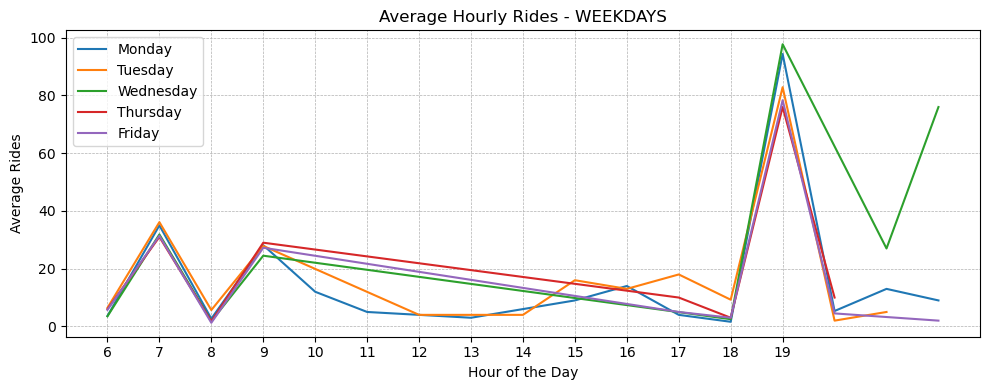

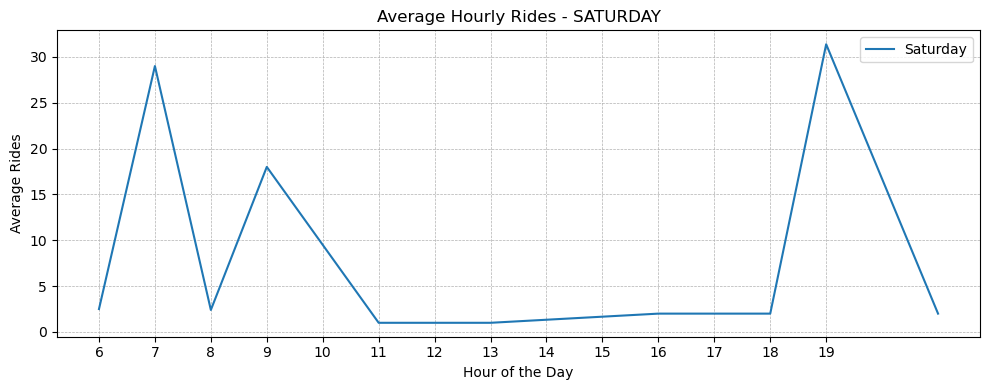

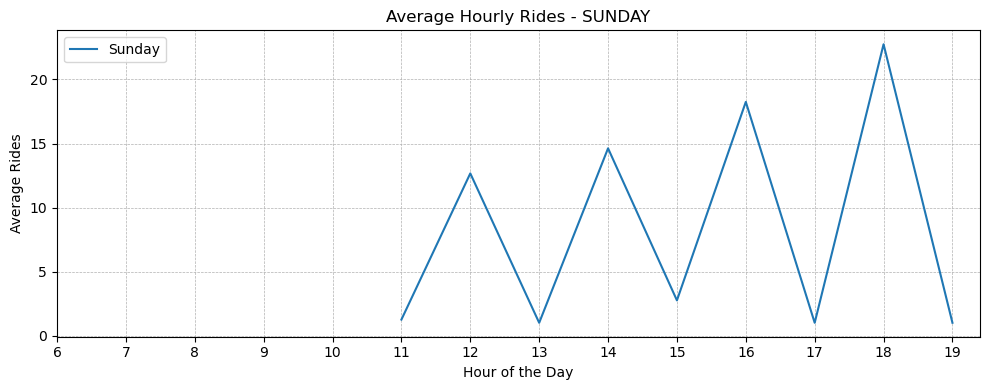

In [530]:
mecidiyekoy_data_w['hour'] = mecidiyekoy_data_w['transaction_date'].dt.hour
hourly_avg = mecidiyekoy_data_w.groupby(['month', 'day_of_week', 'hour']).size().groupby(level=[1,2]).mean().reset_index(name='average_rides')

plt.figure(figsize=(10, 4))

for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
    subset = hourly_avg[hourly_avg['day_of_week'] == day]
    plt.plot(subset['hour'], subset['average_rides'], label=day)

plt.title('Average Hourly Rides - WEEKDAYS')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rides')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(6, 20))
plt.tight_layout()
plt.show()


mecidiyekoy_data_sa['hour'] = mecidiyekoy_data_sa['transaction_date'].dt.hour
hourly_avg = mecidiyekoy_data_sa.groupby(['month', 'day_of_week', 'hour']).size().groupby(level=[1,2]).mean().reset_index(name='average_rides')

plt.figure(figsize=(10, 4))

for day in ['Saturday']:
    subset = hourly_avg[hourly_avg['day_of_week'] == day]
    plt.plot(subset['hour'], subset['average_rides'], label=day)

plt.title('Average Hourly Rides - SATURDAY')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rides')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(6, 20))
plt.tight_layout()
plt.show()

mecidiyekoy_data_su['hour'] = mecidiyekoy_data_su['transaction_date'].dt.hour
hourly_avg = mecidiyekoy_data_su.groupby(['month', 'day_of_week', 'hour']).size().groupby(level=[1,2]).mean().reset_index(name='average_rides')


plt.figure(figsize=(10, 4))

for day in ['Sunday']:
    subset = hourly_avg[hourly_avg['day_of_week'] == day]
    plt.plot(subset['hour'], subset['average_rides'], label=day)

plt.title('Average Hourly Rides - SUNDAY')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rides')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(6, 20))
plt.tight_layout()
plt.show()

## Results

### Otogar Direction

#### Otogar - Weekdays

In [531]:
pd.DataFrame({ 'Current Voyages' : ['06:00', '07:50', '18:00', ' '], 'Required Voyages':['6:22', '7:52', '8:26', '18:31']})

,Current Voyages,Required Voyages
0,06:00,6:22
1,07:50,7:52
2,18:00,8:26
3,,18:31


#### Otogar - Saturday

In [532]:
pd.DataFrame({ 'Current Voyages' : ['06:00', '07:50', '18:00'], 'Required Voyages':['7:51', '8:09', '18:25']})

,Current Voyages,Required Voyages
0,06:00,7:51
1,07:50,8:09
2,18:00,18:25


In [533]:
pd.DataFrame({ 'Current Voyages' : ['11:00', '13:00', '15:00', '17:15'], 'Required Voyages':['11:23', '13:18', '15:37', '17:08']})

,Current Voyages,Required Voyages
0,11:00,11:23
1,13:00,13:18
2,15:00,15:37
3,17:15,17:08


### Mecidiyeköy Direction

#### Mecidiyeköy - Weekdays

In [534]:
pd.DataFrame({'Current Voyages' : ['07:00', '09:10', '19:10'], 'Required Voyages':['7:11', '9:27', '19:19']})


,Current Voyages,Required Voyages
0,07:00,7:11
1,09:10,9:27
2,19:10,19:19


#### Mecidiyeköy - Saturday

In [535]:
pd.DataFrame({ 'Current Voyages' : ['07:00', '09:10', '19:10'], 'Required Voyages':['7:08', '19:23', '']})

,Current Voyages,Required Voyages
0,07:00,7:08
1,09:10,19:23
2,19:10,


#### Mecidiyeköy - Sunday

In [536]:
pd.DataFrame({ 'Current Voyages' : ['12:00', '14:00', '16:00', '18:30'], 'Required Voyages':['18:34', '', '', '']})

,Current Voyages,Required Voyages
0,12:00,18:34
1,14:00,
2,16:00,
3,18:30,


## Voyage Prediction SUNDAY - without January and August

### Otogar Direction

In [537]:
otogar_data_su_x = otogar_data_su
mecidiyekoy_data_su_x = mecidiyekoy_data_su

oto_passengers_su = pd.DataFrame(otogar_data_su.groupby(['month', 'day_of_week']).size().reset_index(name='count'))
oto_passengers_su = oto_passengers_su[~oto_passengers_su['month'].isin([1, 8])]

oto_passengers_su

,month,day_of_week,count
1,2,Sunday,114
2,3,Sunday,163
3,4,Sunday,240
4,5,Sunday,170
5,6,Sunday,134
6,7,Sunday,94


In [538]:
daily_passenger_counts = oto_passengers_su.groupby(['month', 'day_of_week']).sum()
lambda_value = daily_passenger_counts.mean()
prob_150_passengers = poisson.pmf(150, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
k_values = np.arange(100, 300)  
pmf_values = poisson.pmf(k_values, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
expected_buses_needed

count    2.178571
dtype: float64

In [539]:
max_buses = int(np.ceil(lambda_value * 1.5 / bus_capacity))
bus_counts = np.arange(1, max_buses + 1)
cumulative_probs = [poisson.cdf(n * bus_capacity, lambda_value) for n in bus_counts]

### Mecidiyeköy Direction

In [540]:
meci_passengers_su = pd.DataFrame(mecidiyekoy_data_su.groupby(['month', 'day_of_week']).size().reset_index(name='count'))
meci_passengers_su = meci_passengers_su[~meci_passengers_su['month'].isin([1, 8])]

meci_passengers_su

,month,day_of_week,count
1,2,Sunday,54
2,3,Sunday,90
3,4,Sunday,75
4,5,Sunday,118
5,6,Sunday,85
6,7,Sunday,73


In [541]:
daily_passenger_counts = meci_passengers_su.groupby(['month', 'day_of_week']).sum()
lambda_value = daily_passenger_counts.mean()
prob_150_passengers = poisson.pmf(150, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
k_values = np.arange(100, 300)  
pmf_values = poisson.pmf(k_values, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
expected_buses_needed

count    1.178571
dtype: float64

In [542]:
max_buses = int(np.ceil(lambda_value * 1.5 / bus_capacity))
bus_counts = np.arange(1, max_buses + 1)
cumulative_probs = [poisson.cdf(n * bus_capacity, lambda_value) for n in bus_counts]

## Voyage Time Prediction SUNDAY - without January and August

### Otogat Direction

In [543]:
otogar_data_su = otogar_data_su[~otogar_data_su['month'].isin([1, 8])]

peak_sunday_times = get_peak_times(otogar_data_su, 3)

print("Peak Sunday Times:", peak_sunday_times)

Peak Sunday Times: ['13:18', '15:37', '17:08']


### Mecidiyeköy Direction

In [544]:
mecidiyekoy_data_su = mecidiyekoy_data_su[~mecidiyekoy_data_su['month'].isin([1, 8])]

peak_sunday_times = get_peak_times(mecidiyekoy_data_su, 2)

print("Peak Sunday Times:", peak_sunday_times)

Peak Sunday Times: ['16:04', '18:34']


### Results

#### Otogar - Sunday

In [545]:
pd.DataFrame({ 'Current Voyages' : ['11:00', '13:00', '15:00', '17:15'], 'Required Voyages':['','','15:37', '17:08'], 'Required Voyages - Without Jan&Agu': ['','13:18', '15:37','17:08']})

,Current Voyages,Required Voyages,Required Voyages - Without Jan&Agu
0,11:00,,
1,13:00,,13:18
2,15:00,15:37,15:37
3,17:15,17:08,17:08


#### Mecidiyeköy Sunday

In [546]:
pd.DataFrame({ 'Current Voyages' : ['12:00', '14:00', '16:00', '18:30'], 'Required Voyages':['','','','18:34'], 'Required Voyages - Without Jan&Agu': ['','','16:34','18:34']})

,Current Voyages,Required Voyages,Required Voyages - Without Jan&Agu
0,12:00,,
1,14:00,,
2,16:00,,16:34
3,18:30,18:34,18:34


## Voyage Prediction SUNDAY for January & August

### Otogar Direction

In [547]:
oto_passengers_su = pd.DataFrame(otogar_data_su_x.groupby(['month', 'day_of_week']).size().reset_index(name='count'))
oto_passengers_su = oto_passengers_su[~oto_passengers_su['month'].isin([2,3,4,5,6,7])]
oto_passengers_su

,month,day_of_week,count
0,1,Sunday,28
7,8,Sunday,27


In [548]:
daily_passenger_counts = oto_passengers_su.groupby(['month', 'day_of_week']).sum()
lambda_value = daily_passenger_counts.mean()
prob_150_passengers = poisson.pmf(150, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
k_values = np.arange(100, 300)  
pmf_values = poisson.pmf(k_values, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
print(expected_buses_needed)

max_buses = int(np.ceil(lambda_value * 1.5 / bus_capacity))
bus_counts = np.arange(1, max_buses + 1)
cumulative_probs = [poisson.cdf(n * bus_capacity, lambda_value) for n in bus_counts]


count    0.392857
dtype: float64


### Results for Otogar Direction

In [549]:
results = pd.DataFrame({'Days': ['Weekdays', 'Saturday', 'Sunday'], 
                        'Current Voyages' : [3, 3, 4], 
                        'Expected Voyages':[3.341429, 2.173214, 1.732143],
                        'Required Voyages':[4, 3, 2],
                        'Without Jan&Agu - Sunday': ['','', 2.178571],
                        'Jan&Agu - Sunday': ['','', 0.392857],
                        'Without Jan&Agu - Required Voyage Sunday':['', '', 3],
                        'Jan&Agu - Required Voyage Sunday':['', '', 1]})
results.index = results['Days']
results

,Days,Current Voyages,Expected Voyages,Required Voyages,Without Jan&Agu - Sunday,Jan&Agu - Sunday,Without Jan&Agu - Required Voyage Sunday,Jan&Agu - Required Voyage Sunday
Days,,,,,,,,
Weekdays,Weekdays,3,3.341429,4,,,,
Saturday,Saturday,3,2.173214,3,,,,
Sunday,Sunday,4,1.732143,2,2.178571,0.392857,3,1


### Mecidiyeköy Direction

In [550]:
meci_passengers_su = pd.DataFrame(mecidiyekoy_data_su_x.groupby(['month', 'day_of_week']).size().reset_index(name='count'))
meci_passengers_su = meci_passengers_su[~meci_passengers_su['month'].isin([2,3,4,5,6,7])]
meci_passengers_su

,month,day_of_week,count
0,1,Sunday,33
7,8,Sunday,12


In [551]:
daily_passenger_counts = meci_passengers_su.groupby(['month', 'day_of_week']).sum()
lambda_value = daily_passenger_counts.mean()
prob_150_passengers = poisson.pmf(150, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
k_values = np.arange(20, 70)  
pmf_values = poisson.pmf(k_values, lambda_value)

bus_capacity = 70
expected_buses_needed = lambda_value / bus_capacity
print(expected_buses_needed)

max_buses = int(np.ceil(lambda_value * 1.5 / bus_capacity))
bus_counts = np.arange(1, max_buses + 1)
cumulative_probs = [poisson.cdf(n * bus_capacity, lambda_value) for n in bus_counts]

count    0.321429
dtype: float64


### Results for Mecidiyeköy Direction

In [552]:
results = pd.DataFrame({'Days': ['Weekdays', 'Saturday', 'Sunday'], 
                        'Current Voyages' : [3, 3, 4], 
                        'Expected Voyages':[2.323929, 1.185714, 0.964286],
                        'Required Voyages':[3, 2, 1],
                        'Without Jan&Agu - Sunday': ['','', 1.178571],
                        'Jan&Agu - Sunday': ['','',0.321429],
                        'Without Jan&Agu - Required Voyage Sunday':['', '', 2],
                        'Jan&Agu - Required Voyage Sunday':['', '', 1]})
results.index = results['Days']
results

,Days,Current Voyages,Expected Voyages,Required Voyages,Without Jan&Agu - Sunday,Jan&Agu - Sunday,Without Jan&Agu - Required Voyage Sunday,Jan&Agu - Required Voyage Sunday
Days,,,,,,,,
Weekdays,Weekdays,3,2.323929,3,,,,
Saturday,Saturday,3,1.185714,2,,,,
Sunday,Sunday,4,0.964286,1,1.178571,0.321429,2,1


## Voyage Time Prediction SUNDAY for Jan&Agu

### Otogar Direction

In [553]:
otogar_data_su = otogar_data_su_x[~otogar_data_su_x['month'].isin([2,3,4,5,6,7])]

peak_sunday_times = get_peak_times(otogar_data_su, 1)

print("Peak Sunday Times:", peak_sunday_times)

Peak Sunday Times: ['15:23']


In [554]:
pd.DataFrame({ 'Current Voyages' : ['11:00', '13:00', '15:00', '17:15'], 'Required Voyages':['','','15:37', '17:08'], 'Required Voyages - Without Jan&Agu': ['','13:18', '15:37','17:08'],
             'Required - Voyages for Jan&Agu': ['','','15:23','']})

,Current Voyages,Required Voyages,Required Voyages - Without Jan&Agu,Required - Voyages for Jan&Agu
0,11:00,,,
1,13:00,,13:18,
2,15:00,15:37,15:37,15:23
3,17:15,17:08,17:08,


### Mecidiyeköy Direction

In [555]:
mecidiyekoy_data_su = mecidiyekoy_data_su_x[~mecidiyekoy_data_su_x['month'].isin([2,3,4,5,6,7])]

peak_sunday_times = get_peak_times(mecidiyekoy_data_su, 1)

print("Peak Sunday Times:", peak_sunday_times)

Peak Sunday Times: ['18:43']


In [556]:
pd.DataFrame({ 'Current Voyages' : ['12:00', '14:00', '16:00', '18:30'], 'Required Voyages':['','','','18:34'], 'Required Voyages - Without Jan&Agu': ['','','16:34','18:34'],
             'Required - Voyages for Jan&Agu': ['','','','18:43']})

,Current Voyages,Required Voyages,Required Voyages - Without Jan&Agu,Required - Voyages for Jan&Agu
0,12:00,,,
1,14:00,,,
2,16:00,,16:34,
3,18:30,18:34,18:34,18:43
